In [1]:
import pandas as pd
import csv

# for data visualisation and statistical analysis
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
sns.set_style("white")
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

In [2]:
data = pd.read_excel(r'D:/Alfa/Skripsi/Flask/data/Honda_Toyota_Mitsubishi_Suzuki_Daihatsu_excel_clean1.xlsx', sheet_name="Lengkap")
data.head()

,Nomor,Kode,item,Mobil,Jenis,Tipe,gearshift,fuel,distance,city,price,Tahun,harga
0,1,14,Daihatsu Gran Max 1.3 D,Daihatsu,Gran Max,1.3 D DLi,Manual,Bensin,1,Jawa Timur,97.5,2013,97500000
1,3,32,Daihatsu Xenia 1.3 R MT Manual Velg...,Daihatsu,Xenia,1.3 R,Manual,Bensin,13000,Banten,136.0,2018,136000000
2,4,35,Daihatsu Xenia 1.3 X MT Manual Mura...,Daihatsu,Xenia,1.3 X,Manual,Bensin,54000,Banten,117.0,2016,117000000
3,5,36,Daihatsu Sigra 1.2 X MT Manual Mura...,Daihatsu,Sigra,1.2 X,Manual,Bensin,48000,Banten,89.0,2016,89000000
4,6,37,Daihatsu Xenia 1.3 R MT Manual Mura...,Daihatsu,Xenia,1.3 R,Manual,Bensin,13000,Banten,130.0,2018,130000000


In [4]:
df = data.loc[:, ['Mobil','Jenis','Tipe','gearshift','fuel','distance','city','Tahun','harga']]
df.head()

,Mobil,Jenis,Tipe,gearshift,fuel,distance,city,Tahun,harga
0,Daihatsu,Gran Max,1.3 D DLi,Manual,Bensin,1,Jawa Timur,2013,97500000
1,Daihatsu,Xenia,1.3 R,Manual,Bensin,13000,Banten,2018,136000000
2,Daihatsu,Xenia,1.3 X,Manual,Bensin,54000,Banten,2016,117000000
3,Daihatsu,Sigra,1.2 X,Manual,Bensin,48000,Banten,2016,89000000
4,Daihatsu,Xenia,1.3 R,Manual,Bensin,13000,Banten,2018,130000000


In [5]:
print(len(df))
print(len(data))

15339
15339


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15339 entries, 0 to 15338
Data columns (total 9 columns):
Mobil        15339 non-null object
Jenis        15339 non-null object
Tipe         15339 non-null object
gearshift    15339 non-null object
fuel         15339 non-null object
distance     15339 non-null int64
city         15339 non-null object
Tahun        15339 non-null int64
harga        15339 non-null int64
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


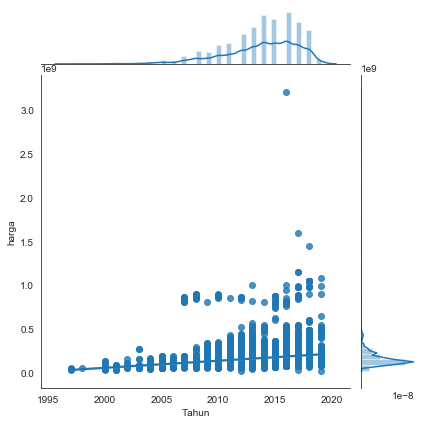

In [7]:
sns.jointplot("Tahun", "harga", data=df, kind='reg')

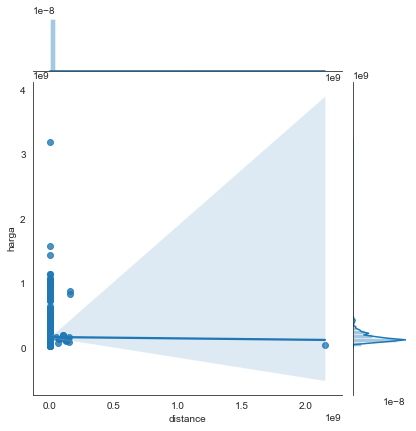

In [9]:
sns.jointplot("distance", "harga", data=df, kind='reg')

[Text(0.5, 0, '')]

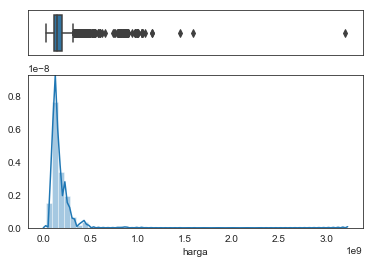

In [47]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .85)})
 
# Add a graph in each part
sns.boxplot(df["harga"], ax=ax_box)
sns.distplot(df["harga"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


[Text(0.5, 0, '')]

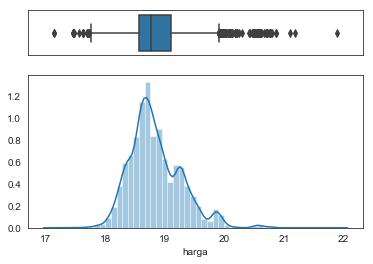

In [57]:
## Histogram Hasil Transformasi Log
log_price = np.log1p(df['harga'])
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .85)})
 
# Add a graph in each part
sns.boxplot(log_price, ax=ax_box)
sns.distplot(log_price, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


#### Correlation Between Numeric Variables

In [24]:

corr = df[['distance','Tahun','harga']].corr()
corr.style.background_gradient(cmap='coolwarm')

,distance,Tahun,harga
distance,1,-0.045959,-0.00368052
Tahun,-0.045959,1,0.260824
harga,-0.00368052,0.260824,1


#### Relationship Between Indepnden Categorical Variable with Dependent Variables

In [29]:
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
rp.summary_cont(data['harga'].groupby(data['Mobil']))

,N,Mean,SD,SE,95% Conf.,Interval
Mobil,,,,,,
Daihatsu,2880,1.137648e+08,3.358391e+07,6.257992e+05,1.125380e+08,1.149916e+08
Honda,5162,1.811369e+08,8.258402e+07,1.149442e+06,1.788838e+08,1.833901e+08
Mitsubishi,1186,2.827715e+08,1.061140e+08,3.081274e+06,2.767296e+08,2.888133e+08
Suzuki,1713,1.205673e+08,3.037086e+07,7.338012e+05,1.191286e+08,1.220060e+08
Toyota,4398,1.834310e+08,1.302408e+08,1.963901e+06,1.795813e+08,1.872807e+08


In [31]:
results = ols('harga ~ C(Mobil)', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  harga   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     893.1
Date:                Thu, 27 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:03:30   Log-Likelihood:            -3.0293e+05
No. Observations:               15339   AIC:                         6.059e+05
Df Residuals:                   15334   BIC:                         6.059e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.138e+08    1.7e+06     66.835      0.000     1.1e+08    1.17e+08
C(Mobil)[T.Honda]       6.737e+07   2.12e+06     31.711      0.000    6.32e+07    7.15e+07
C(Mobil)[T.Mitsubishi]   1.69e+08   3.15e+06     53.624      0.000    1.63e+08    1.75e+08
C(Mobil)[T.Suzuki]      6.802e+06   2.79e+06      2.441      0.015    1.34e+06    1.23e+07
C(Mobil)[T.Toyota]      6.967e+07   2.19e+06     31.816      0.000    6.54e+07     7.4e+07
==============================================================================
Omnibus:                    18839.895   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7513618.345
Skew:                           6.250   Prob(JB):                         0.00
Kurtosis:                     110.703   Cond. No.                         6.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
results = ols('harga ~ C(Jenis)', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  harga   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     541.7
Date:                Thu, 27 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:05:15   Log-Likelihood:            -2.9788e+05
No. Observations:               15339   AIC:                         5.958e+05
Df Residuals:                   15299   BIC:                         5.962e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     9.49e+07   4.97e+06     19.076      0.000    8.51e+07    1.05e+08
C(Jenis)[T.Accord]           1.032e+08   7.94e+06     12.995      0.000    8.76e+07    1.19e+08
C(Jenis)[T.Agya]             8.532e+06   6.12e+06      1.394      0.163   -3.46e+06    2.05e+07
C(Jenis)[T.Alphard]          4.393e+08    7.6e+06     57.777      0.000    4.24e+08    4.54e+08
C(Jenis)[T.Avanza]           3.643e+07   5.34e+06      6.818      0.000     2.6e+07    4.69e+07
C(Jenis)[T.Ayla]             8.004e+05   5.71e+06      0.140      0.888   -1.04e+07     1.2e+07
C(Jenis)[T.BR-V]             8.935e+07   6.83e+06     13.086      0.000     7.6e+07    1.03e+08
C(Jenis)[T.Baleno]           9.132e+06   9.97e+06      0.916      0.360   -1.04e+07    2.87e+07
C(Jenis)[T.Brio]             3.095e+07   5.55e+06      5.582      0.000    2.01e+07    4.18e+07
C(Jenis)[T.CR-V]             1.005e+08   5.47e+06     18.356      0.000    8.98e+07    1.11e+08
C(Jenis)[T.Calya]            2.494e+07   6.43e+06      3.875      0.000    1.23e+07    3.75e+07
C(Jenis)[T.City]              2.62e+07   6.77e+06      3.872      0.000    1.29e+07    3.95e+07
C(Jenis)[T.Civic]            3.158e+08   7.65e+06     41.261      0.000    3.01e+08    3.31e+08
C(Jenis)[T.Ertiga]           4.461e+07   5.56e+06      8.020      0.000    3.37e+07    5.55e+07
C(Jenis)[T.Etios]            8.913e+06   9.97e+06      0.894      0.371   -1.06e+07    2.85e+07
C(Jenis)[T.Fortuner]         2.075e+08   5.74e+06     36.148      0.000    1.96e+08    2.19e+08
C(Jenis)[T.Freed]            6.157e+07   7.05e+06      8.738      0.000    4.78e+07    7.54e+07
C(Jenis)[T.Gran Max]        -4.814e+06    6.1e+06     -0.789      0.430   -1.68e+07    7.15e+06
C(Jenis)[T.Grand Vitara]     2.235e+07    8.6e+06      2.599      0.009    5.49e+06    3.92e+07
C(Jenis)[T.HR-V]             1.521e+08    5.5e+06     27.682      0.000    1.41e+08    1.63e+08
C(Jenis)[T.Ignis]            3.518e+07   7.67e+06      4.586      0.000    2.01e+07    5.02e+07
C(Jenis)[T.Jazz]             7.575e+07   5.36e+06     14.126      0.000    6.52e+07    8.63e+07
C(Jenis)[T.Karimun Wagon]    -1.23e+07    7.6e+06     -1.618      0.106   -2.72e+07     2.6e+06
C(Jenis)[T.Kijang Innova]    1.004e+08   5.39e+06     18.609      0.000    8.98e+07    1.11e+08
C(Jenis)[T.Mirage]           3.134e+06   8.36e+06      0.375      0.708   -1.33e+07    1.95e+07
C(Jenis)[T.Mobilio]          5.542e+07   5.43e+06     10.207      0.000    4.48e+07    6.61e+07
C(Jenis)[T.Outlander Sport]  9.528e+07   7.82e+06     12.185      0.000       8e+07    1.11e+08
C(Jenis)[T.Pajero Sport]     2.425e+08   5.52e+06     43.900      0.000    2.32e+08    2.53e+08
C(Jenis)[T.Rush]             7.537e+07   6.05e+06     12.450      0.000    6.35e+07    8.72e+07
C(Jenis)[T.

In [33]:
results = ols('harga ~ C(Tipe)', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  harga   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     190.8
Date:                Thu, 27 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:06:06   Log-Likelihood:            -2.9549e+05
No. Observations:               15339   AIC:                         5.913e+05
Df Residuals:                   15159   BIC:                         5.927e+05
Df Model:                         179                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          9.655e+07   9.18e+06     10.523      0.000    7.86e+07    1.15e+08
C(Tipe)[T.1.0 D+]                 -1.583e+07   1.69e+07     -0.939      0.348   -4.89e+07    1.72e+07
C(Tipe)[T.1.0 GL]                 -1.338e+07   1.27e+07     -1.057      0.291   -3.82e+07    1.14e+07
C(Tipe)[T.1.0 GS]                 -8.121e+06   1.15e+07     -0.707      0.480   -3.06e+07    1.44e+07
C(Tipe)[T.1.0 GX]                 -3.283e+07   1.52e+07     -2.166      0.030   -6.25e+07   -3.13e+06
C(Tipe)[T.1.0 Li]                 -1.596e+07   1.08e+07     -1.477      0.140   -3.71e+07    5.22e+06
C(Tipe)[T.1.0 M]                  -1.707e+06   1.01e+07     -0.170      0.865   -2.14e+07     1.8e+07
C(Tipe)[T.1.0 M Sporty]           -5.053e+06    4.1e+07     -0.123      0.902   -8.55e+07    7.54e+07
C(Tipe)[T.1.0 Mi]                 -1.422e+07   3.39e+07     -0.419      0.675   -8.07e+07    5.23e+07
C(Tipe)[T.1.0 X]                  -2.245e+06   9.66e+06     -0.233      0.816   -2.12e+07    1.67e+07
C(Tipe)[T.1.0 X Deluxe]            1.195e+07    4.1e+07      0.291      0.771   -6.85e+07    9.24e+07
C(Tipe)[T.1.0 X Elegant]          -2.953e+06   2.01e+07     -0.147      0.883   -4.24e+07    3.64e+07
C(Tipe)[T.1.2 E]                   2.559e+07   9.49e+06      2.696      0.007    6.98e+06    4.42e+07
C(Tipe)[T.1.2 E CVT]               3.503e+07   1.38e+07      2.536      0.011    7.95e+06    6.21e+07
C(Tipe)[T.1.2 Exceed]              1.547e+06   1.72e+07      0.090      0.929   -3.23e+07    3.54e+07
C(Tipe)[T.1.2 G]                   1.471e+07   9.59e+06      1.533      0.125    -4.1e+06    3.35e+07
C(Tipe)[T.1.2 GL]                  6.224e+06      1e+07      0.620      0.535   -1.35e+07    2.59e+07
C(Tipe)[T.1.2 GLS]                  1.43e+05   1.49e+07      0.010      0.992   -2.91e+07    2.94e+07
C(Tipe)[T.1.2 GLX]                -2.263e+04   1.22e+07     -0.002      0.999   -2.39e+07    2.38e+07
C(Tipe)[T.1.2 GX]                  3.584e+07   1.11e+07      3.229      0.001    1.41e+07    5.76e+07
C(Tipe)[T.1.2 R]                   2.163e+07   1.13e+07      1.916      0.055   -4.98e+05    4.38e+07
C(Tipe)[T.1.2 R Deluxe]            2.033e+07   1.03e+07      1.980      0.048    1.99e+05    4.05e+07
C(Tipe)[T.1.2 RS]                  5.516e+07   1.08e+07      5.103      0.000     3.4e+07    7.63e+07
C(Tipe)[T.1.2 RS CVT]              5.678e+07   3.39e+07      1.674      0.094    -9.7e+06    1.23e+08
C(Tipe)[T.1.2 S]                   1.495e+07   1.12e+07      1.333      0.183   -7.03e+06    3.69e+07
C(Tipe)[T.1.2 Sport]               1.457e+07    2.2e+07      0.662      0.508   -2.86e+07    5.77e+07
C(Tipe)[T.1.2 TRD S]               1.165e+07   1.02e+07      1.146      0.252   -8.27e+06    3.16e+07
C(Tipe)[T.1.2 Valco E] 

In [34]:
results = ols('harga ~ C(gearshift)', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  harga   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     2188.
Date:                Thu, 27 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:06:45   Log-Likelihood:            -3.0351e+05
No. Observations:               15339   AIC:                         6.070e+05
Df Residuals:                   15337   BIC:                         6.070e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.331e+08    1.1e+06    120.522      0.000    1.31e+08    1.35e+08
C(gearshift)[T.Otomatis]  7.171e+07   1.53e+06     46.773      0.000    6.87e+07    7.47e+07
==============================================================================
Omnibus:                    17394.969   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5057811.069
Skew:                           5.471   Prob(JB):                         0.00
Kurtosis:                      91.283   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
results = ols('harga ~ C(fuel)', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  harga   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     3906.
Date:                Thu, 27 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:06:59   Log-Likelihood:            -3.0280e+05
No. Observations:               15339   AIC:                         6.056e+05
Df Residuals:                   15337   BIC:                         6.056e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.557e+08   7.67e+05    202.862      0.000    1.54e+08    1.57e+08
C(fuel)[T.Solar]  1.578e+08   2.53e+06     62.499      0.000    1.53e+08    1.63e+08
==============================================================================
Omnibus:                    19090.927   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6848953.239
Skew:                           6.461   Prob(JB):                         0.00
Kurtosis:                     105.709   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
results = ols('harga ~ C(city)', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  harga   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.418
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           3.52e-07
Time:                        08:07:33   Log-Likelihood:            -3.0450e+05
No. Observations:               15339   AIC:                         6.090e+05
Df Residuals:                   15318   BIC:                         6.092e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      1.032e+08   2.39e+07      4.325      0.000    5.64e+07     1.5e+08
C(city)[T.Bali]                5.933e+07   2.41e+07      2.459      0.014     1.2e+07    1.07e+08
C(city)[T.Banten]              5.937e+07   2.42e+07      2.452      0.014    1.19e+07    1.07e+08
C(city)[T.Bengkulu]            3.028e+07    5.6e+07      0.541      0.589   -7.94e+07     1.4e+08
C(city)[T.DI Yogyakarta]       7.164e+07   2.46e+07      2.908      0.004    2.33e+07     1.2e+08
C(city)[T.DKI Jakarta]         6.928e+07   2.39e+07      2.900      0.004    2.24e+07    1.16e+08
C(city)[T.Jambi]               7.544e+07   2.89e+07      2.615      0.009    1.89e+07    1.32e+08
C(city)[T.Jawa Barat]          4.977e+07   2.41e+07      2.068      0.039     2.6e+06    9.69e+07
C(city)[T.Jawa Tengah]         6.566e+07   2.41e+07      2.719      0.007    1.83e+07    1.13e+08
C(city)[T.Jawa Timur]           6.82e+07   2.41e+07      2.836      0.005    2.11e+07    1.15e+08
C(city)[T.Kalimantan Barat]    5.264e+07   3.22e+07      1.636      0.102   -1.04e+07    1.16e+08
C(city)[T.Kalimantan Selatan]  7.256e+07   2.47e+07      2.942      0.003    2.42e+07    1.21e+08
C(city)[T.Kalimantan Timur]    6.494e+07   2.47e+07      2.634      0.008    1.66e+07    1.13e+08
C(city)[T.Kepulauan Riau]      7.656e+07   2.43e+07      3.145      0.002    2.88e+07    1.24e+08
C(city)[T.Lampung]             6.655e+07    2.6e+07      2.563      0.010    1.57e+07    1.17e+08
C(city)[T.NTB]                -1.722e+07   1.04e+08     -0.166      0.869   -2.21e+08    1.87e+08
C(city)[T.Sulawesi Selatan]    6.189e+07   2.44e+07      2.533      0.011     1.4e+07     1.1e+08
C(city)[T.Sulawesi Utara]      6.694e+07   3.54e+07      1.891      0.059   -2.44e+06    1.36e+08
C(city)[T.Sumatra Barat]       2.265e+07    5.6e+07      0.405      0.686   -8.71e+07    1.32e+08
C(city)[T.Sumatra Selatan]     7.066e+07   2.52e+07      2.798      0.005    2.12e+07     1.2e+08
C(city)[T.Sumatra Utara]       7.826e+07   2.42e+07      3.232      0.001    3.08e+07    1.26e+08
==============================================================================
Omnibus:                    16594.198   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3512845.372
Skew:                           5.126   Prob(JB):                         0.00
Kurtosis:                      76.425   Cond. No.                         169.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
from sklearn import preprocessing 
category_col =['Mobil', 'Jenis', 'Tipe', 'gearshift', 'fuel',  'city']  
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    df[col] = labelEncoder.fit_transform(df[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict)

{'Mobil': {'Daihatsu': 0, 'Honda': 1, 'Mitsubishi': 2, 'Suzuki': 3, 'Toyota': 4}, 'Jenis': {'APV': 0, 'Accord': 1, 'Agya': 2, 'Alphard': 3, 'Avanza': 4, 'Ayla': 5, 'BR-V': 6, 'Baleno': 7, 'Brio': 8, 'CR-V': 9, 'Calya': 10, 'City': 11, 'Civic': 12, 'Ertiga': 13, 'Etios': 14, 'Fortuner': 15, 'Freed': 16, 'Gran Max': 17, 'Grand Vitara': 18, 'HR-V': 19, 'Ignis': 20, 'Jazz': 21, 'Karimun Wagon': 22, 'Kijang Innova': 23, 'Mirage': 24, 'Mobilio': 25, 'Outlander Sport': 26, 'Pajero Sport': 27, 'Rush': 28, 'SX4': 29, 'Sigra': 30, 'Sirion': 31, 'Splash': 32, 'Swift': 33, 'Terios': 34, 'Vellfire': 35, 'Vios': 36, 'Xenia': 37, 'Xpander': 38, 'Yaris': 39}, 'Tipe': {'1.0 D': 0, '1.0 D+': 1, '1.0 GL': 2, '1.0 GS': 3, '1.0 GX': 4, '1.0 Li': 5, '1.0 M': 6, '1.0 M Sporty': 7, '1.0 Mi': 8, '1.0 X': 9, '1.0 X Deluxe': 10, '1.0 X Elegant': 11, '1.2 E': 12, '1.2 E CVT': 13, '1.2 Exceed': 14, '1.2 G': 15, '1.2 GL': 16, '1.2 GLS': 17, '1.2 GLX': 18, '1.2 GX': 19, '1.2 R': 20, '1.2 R Deluxe': 21, '1.2 RS': 22,

In [7]:
X = df[['Mobil','Jenis','Tipe','gearshift','fuel','distance','city','Tahun']]
Y = df.harga
X.head()

,Mobil,Jenis,Tipe,gearshift,fuel,distance,city,Tahun
0,0,17,34,0,0,1,9,2013
1,0,37,45,0,0,13000,2,2018
2,0,37,50,0,0,54000,2,2016
3,0,30,31,0,0,48000,2,2016
4,0,37,45,0,0,13000,2,2018


In [8]:
#export_csv = df.to_csv (r'D:/Alfa/Skripsi/Flask/data/label.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
y = df.to_csv (r'D:/Alfa/Skripsi/Flask/data/y.csv', index = None, header=True)

In [9]:
# now we use the train_test_split function already available in sklearn library to split our data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state = 10000)
X_train.shape, X_test.shape

((10737, 8), (4602, 8))

# Membangun Model

## Regresi Linear Berganda

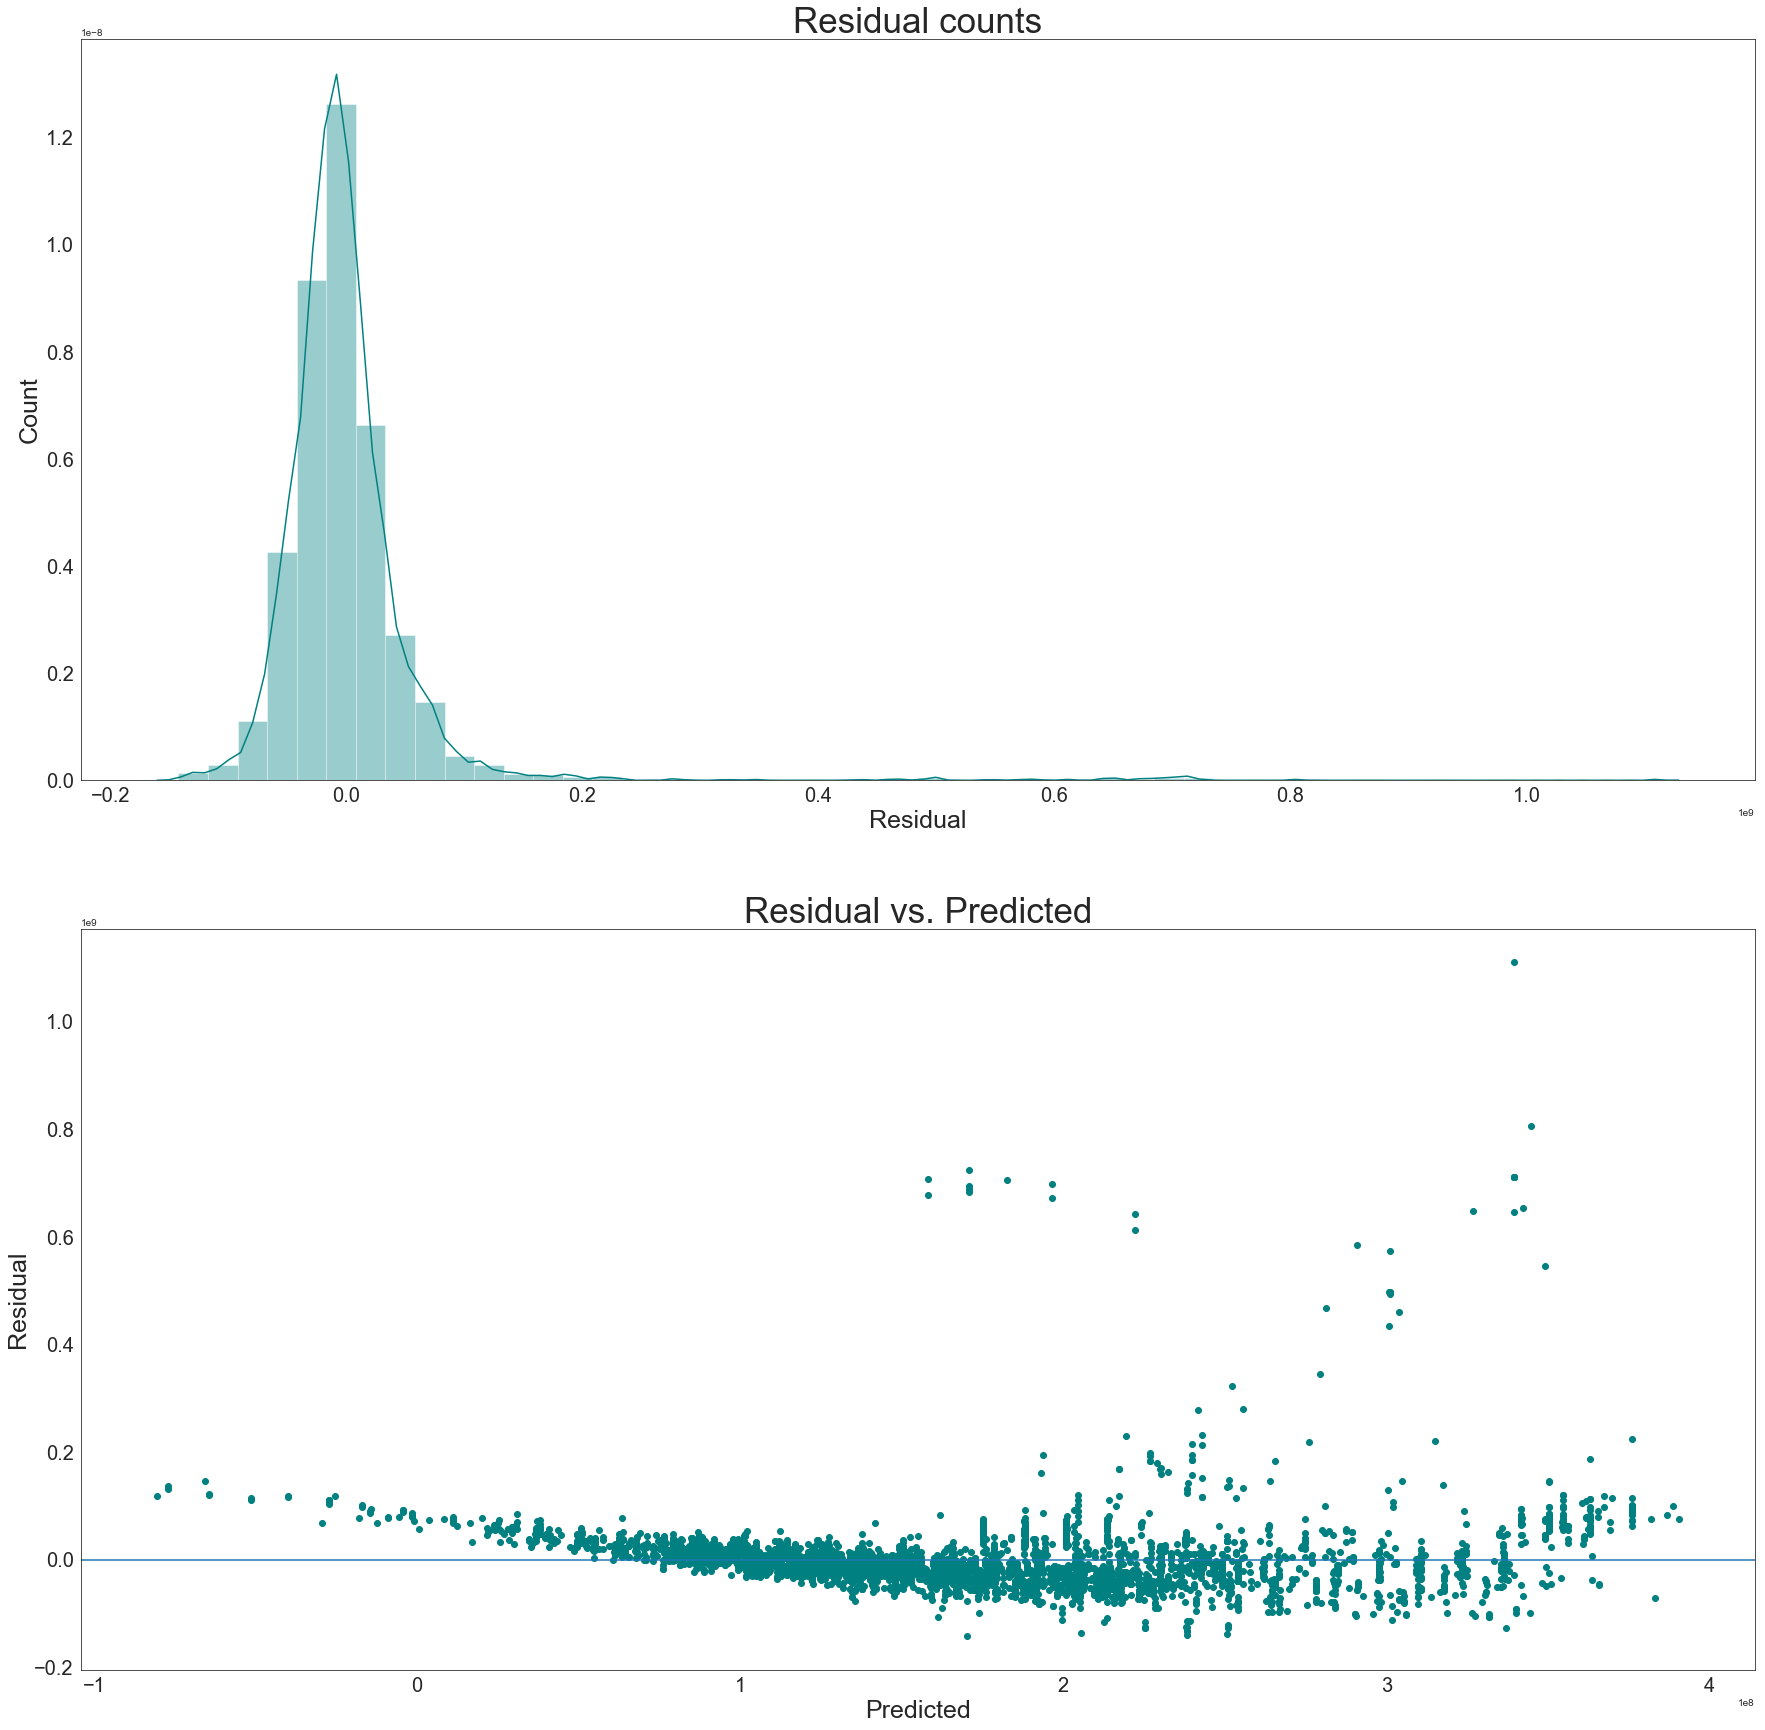

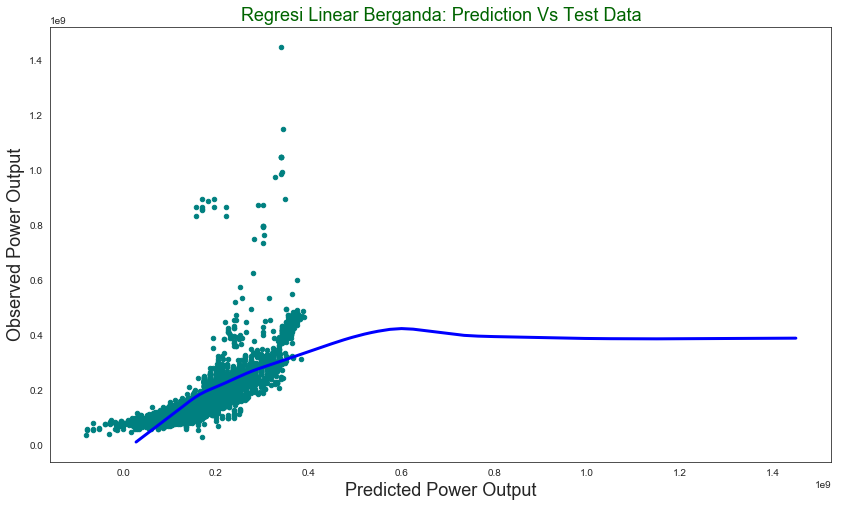

---------------
Evaluasi Model Regresi Linear Berganda
RMSE Test Data:67179968.14
Variance score Test Data:0.55
Variance score Test Data:0.51


In [59]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted_reg = regr.predict(X_test)
residual = Y_test - predicted_reg

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted_reg, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

## Membuat Scatter Plot
predicted_reg = predicted_reg.reshape(4602,)
Y_test = Y_test.reshape(4602)
test = pd.DataFrame({"prediction": predicted_reg.flatten(), "observed": Y_test.flatten()})
lowess = sm.nonparametric.lowess
z = lowess(predicted_reg.flatten(), Y_test.flatten())
test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'teal')
plt.title("Regresi Linear Berganda: Prediction Vs Test Data", fontsize = 18, color = "darkgreen")
plt.xlabel("Predicted Power Output", fontsize = 18) 
plt.ylabel("Observed Power Output", fontsize = 18)
plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)
plt.show()

print ("---------------")
print ("Evaluasi Model Regresi Linear Berganda")
from sklearn.metrics import mean_squared_error
rmse_lr = np.sqrt(mean_squared_error(Y_test, predicted_reg))
print('RMSE Test Data:{}'.format(np.round(rmse_lr,2)))

# R square 
from sklearn.metrics import r2_score
r2_lr_test = r2_score(Y_test, predicted_reg)
r2_lr_train = regr.score(X_train, Y_train)
print('Variance score Test Data:{}'.format(np.round(r2_lr_test,2)))
print('Variance score Test Data:{}'.format(np.round(r2_lr_train,2)))

### Ridge Regression

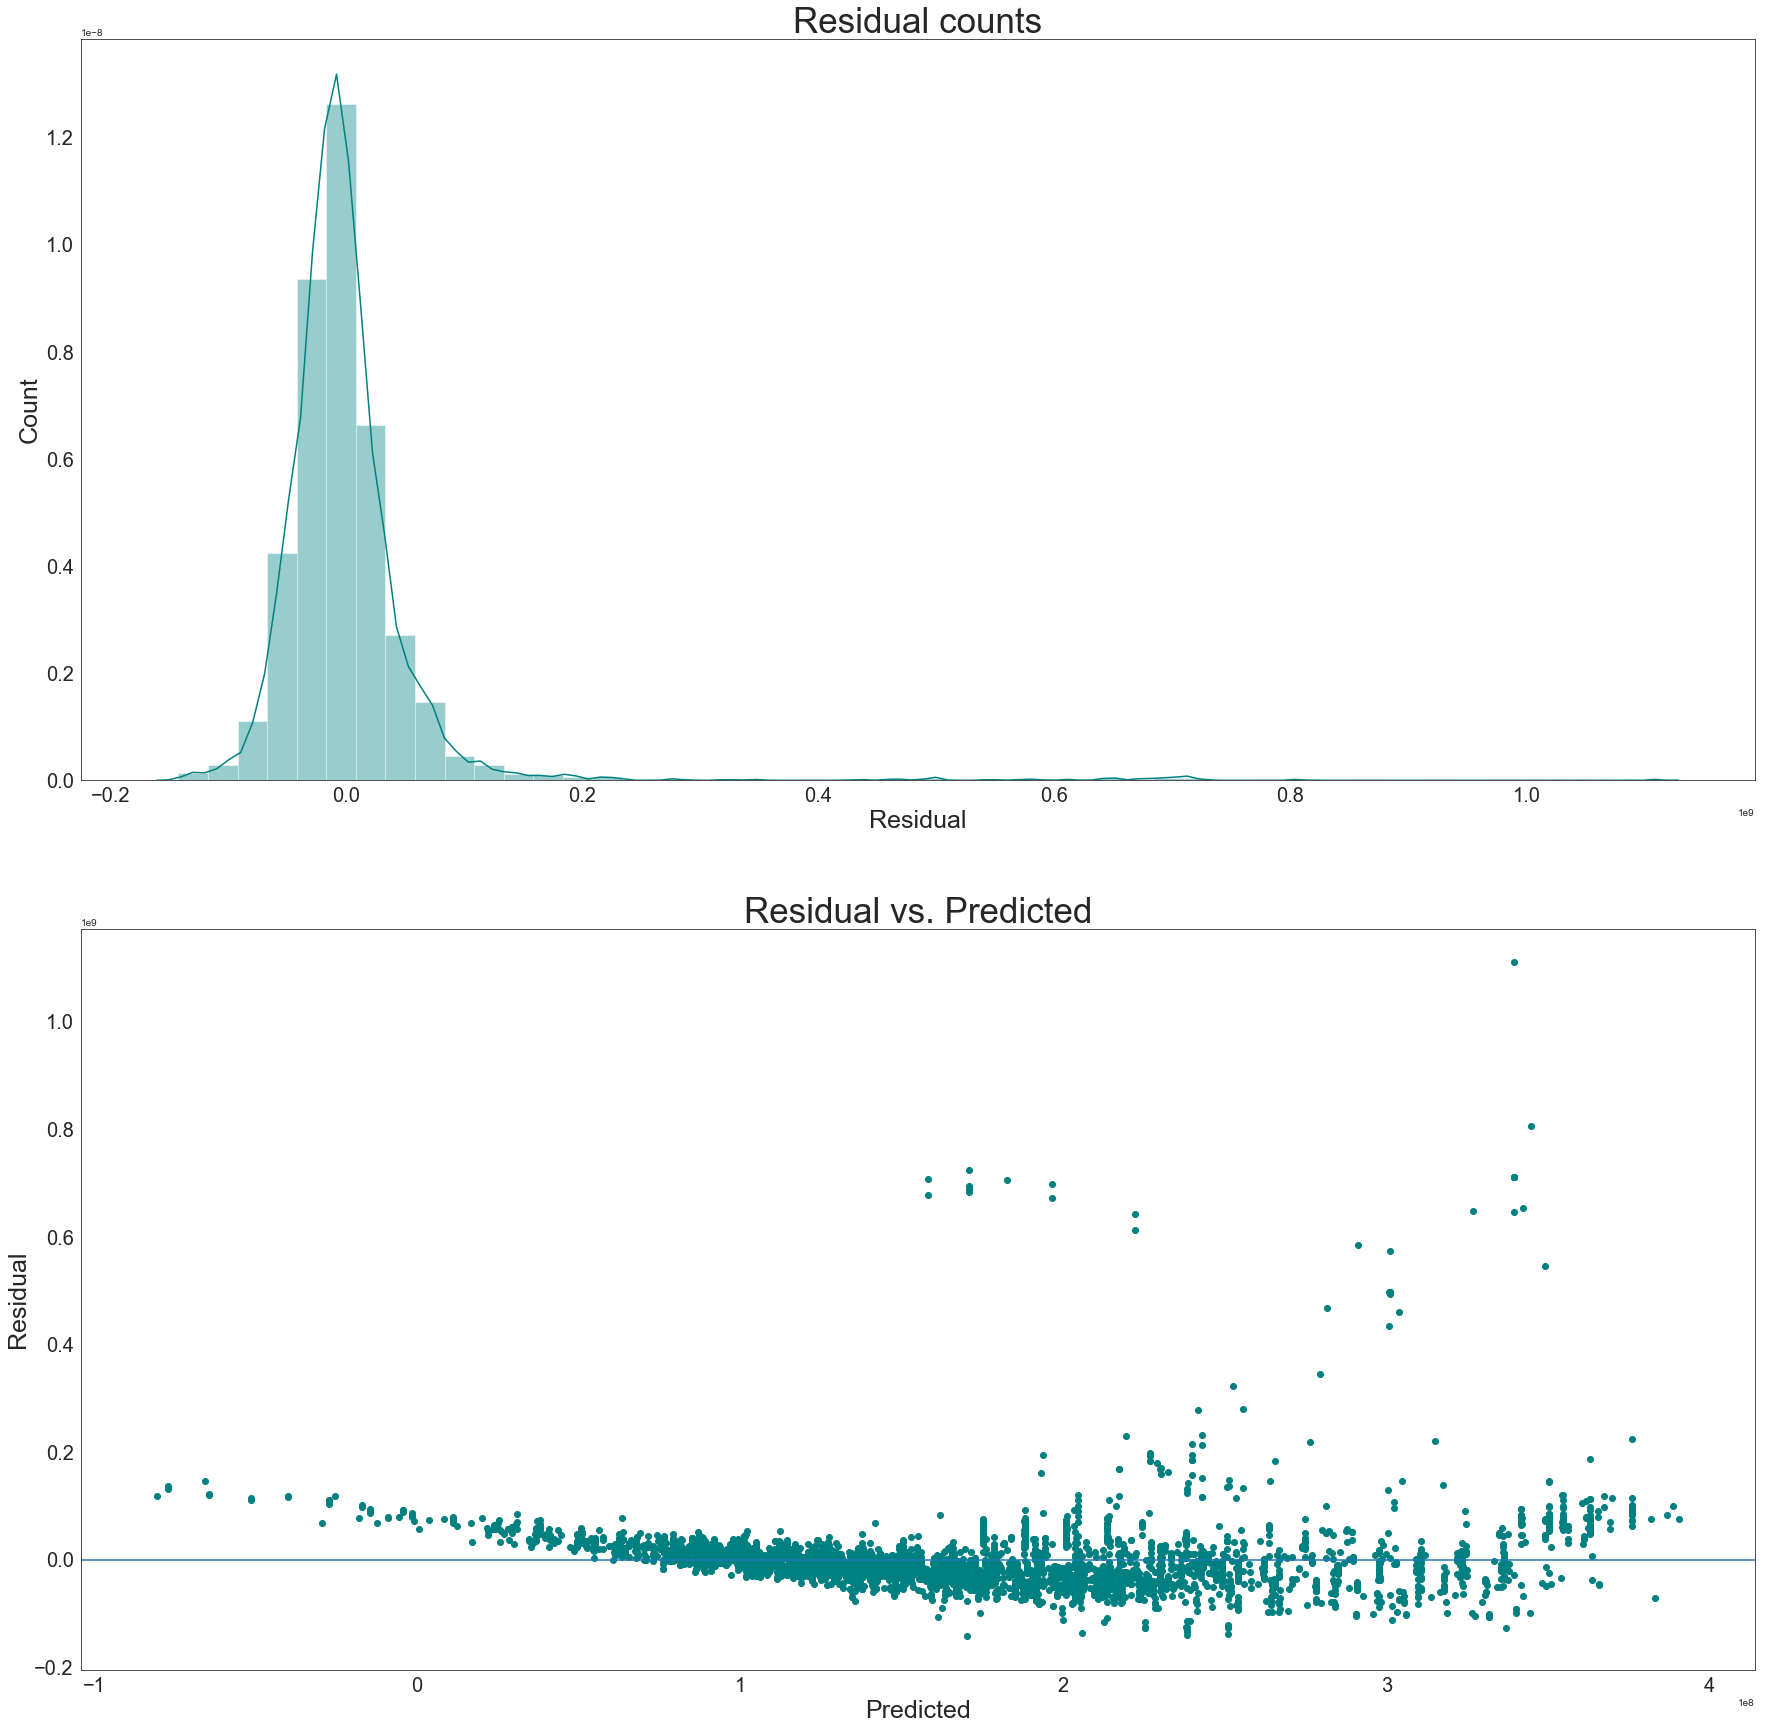

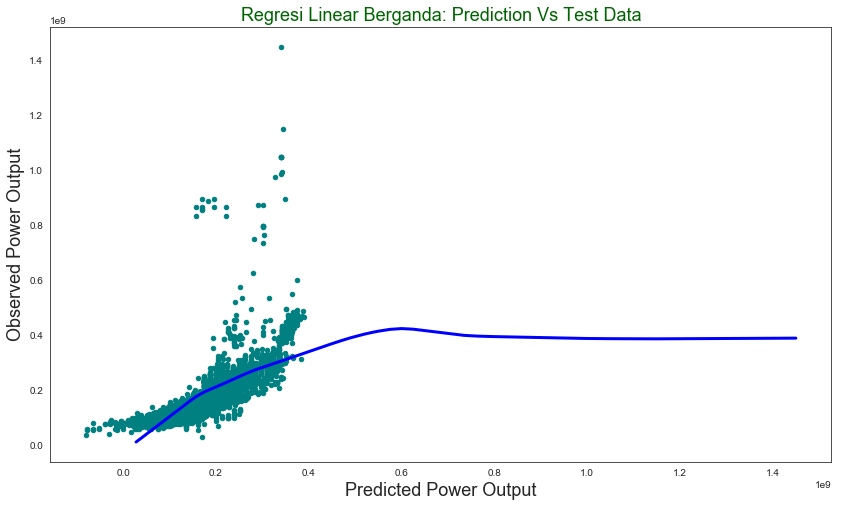

---------------
Evaluasi Model Regresi Linear Berganda
RMSE Test Data:67179520.11
Variance score Test Data:0.55
Variance score Test Data:0.51


In [15]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, Y_train)

predicted_ridge_reg = ridge_reg.predict(X_test)
residual = Y_test - predicted_ridge_reg

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted_ridge_reg, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

## Membuat Scatter Plot
predicted_ridge_reg = predicted_ridge_reg.reshape(4602,)
Y_test = Y_test.reshape(4602)
test = pd.DataFrame({"prediction": predicted_ridge_reg.flatten(), "observed": Y_test.flatten()})
lowess = sm.nonparametric.lowess
z = lowess(predicted_ridge_reg.flatten(), Y_test.flatten())
test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'teal')
plt.title("Regresi Linear Berganda: Prediction Vs Test Data", fontsize = 18, color = "darkgreen")
plt.xlabel("Predicted Power Output", fontsize = 18) 
plt.ylabel("Observed Power Output", fontsize = 18)
plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)
plt.show()

print ("---------------")
print ("Evaluasi Model Regresi Linear Berganda")
from sklearn.metrics import mean_squared_error
rmse_lr = np.sqrt(mean_squared_error(Y_test, predicted_ridge_reg))
print('RMSE Test Data:{}'.format(np.round(rmse_lr,2)))

# R square 
from sklearn.metrics import r2_score
r2_ridge_reg_test = r2_score(Y_test, predicted_ridge_reg)
r2_ridge_reg_train = regr.score(X_train, Y_train)
print('Variance score Test Data:{}'.format(np.round(r2_ridge_reg_test,2)))
print('Variance score Test Data:{}'.format(np.round(r2_ridge_reg_train,2)))

### Lasso Regression

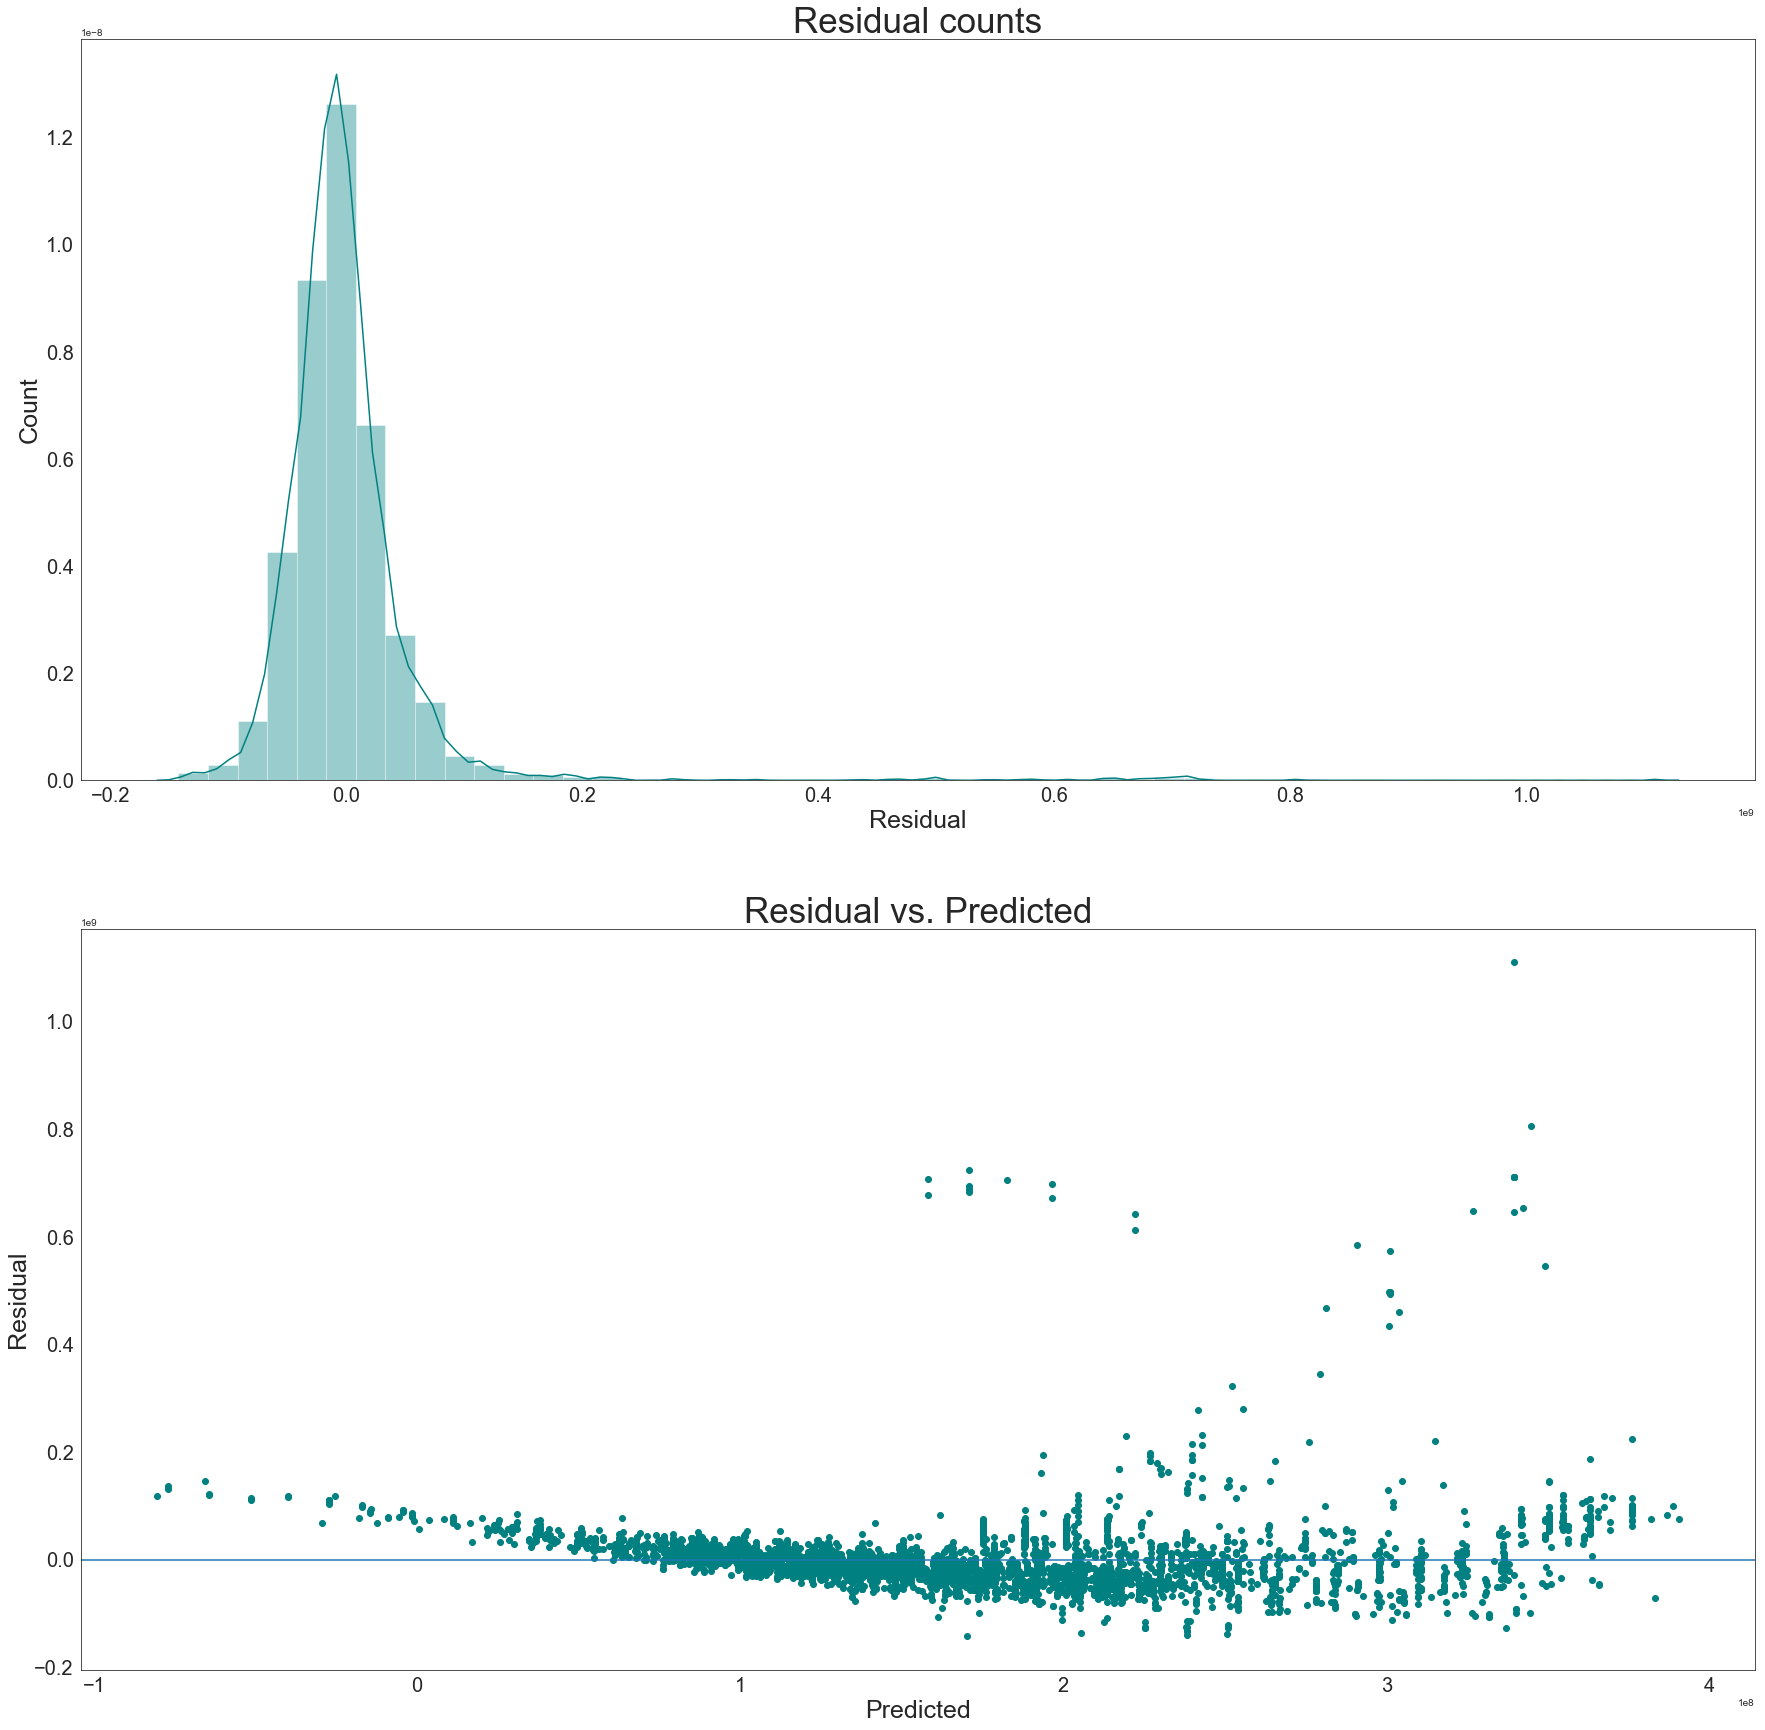

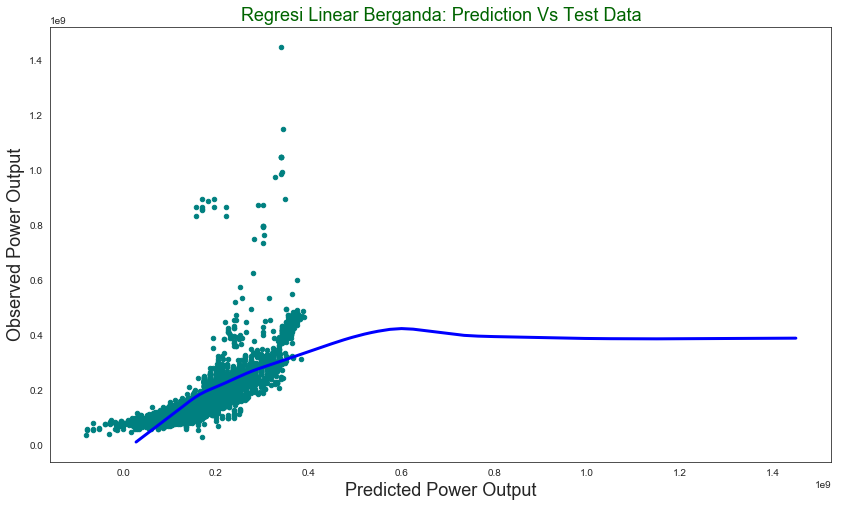

---------------
Evaluasi Model Regresi Linear Berganda
RMSE Test Data:67179968.13
Variance score Test Data:0.55
Variance score Test Data:0.51


In [16]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train)

predicted_model_lasso = model_lasso.predict(X_test)
residual = Y_test - predicted_model_lasso

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted_model_lasso, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

## Membuat Scatter Plot
predicted_model_lasso = predicted_model_lasso.reshape(4602,)
Y_test = Y_test.reshape(4602)
test = pd.DataFrame({"prediction": predicted_model_lasso.flatten(), "observed": Y_test.flatten()})
lowess = sm.nonparametric.lowess
z = lowess(predicted_model_lasso.flatten(), Y_test.flatten())
test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'teal')
plt.title("Regresi Linear Berganda: Prediction Vs Test Data", fontsize = 18, color = "darkgreen")
plt.xlabel("Predicted Power Output", fontsize = 18) 
plt.ylabel("Observed Power Output", fontsize = 18)
plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)
plt.show()

print ("---------------")
print ("Evaluasi Model Regresi Linear Berganda")
from sklearn.metrics import mean_squared_error
rmse_lr = np.sqrt(mean_squared_error(Y_test, predicted_model_lasso))
print('RMSE Test Data:{}'.format(np.round(rmse_lr,2)))

# R square 
from sklearn.metrics import r2_score
r2_model_lasso_test = r2_score(Y_test, predicted_model_lasso)
r2_model_lasso_train = regr.score(X_train, Y_train)
print('Variance score Test Data:{}'.format(np.round(r2_model_lasso_test,2)))
print('Variance score Test Data:{}'.format(np.round(r2_model_lasso_train,2)))

## K-Nearest Neighbors

### Memilih K Terbaik

In [16]:
from sklearn import neighbors
rmse_l = []
num = []
for n in range(2, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    num.append(n)

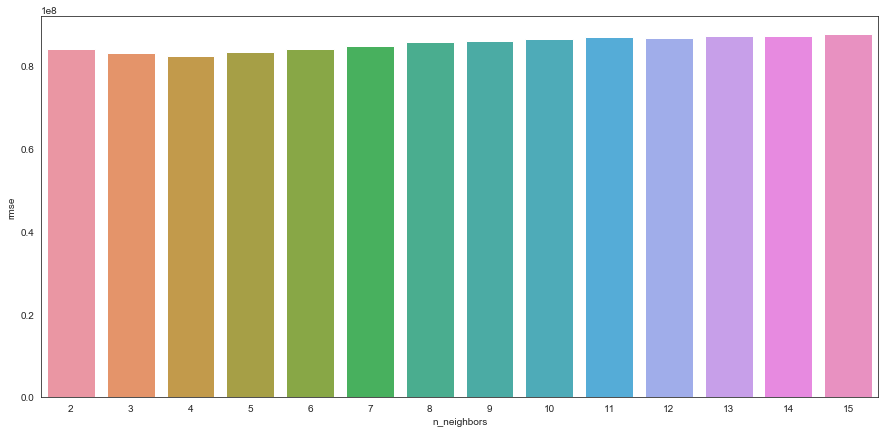

In [17]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()

Berdasarkan Plot, dapat dilihat bahwa jumlah k optimal adalah 4, karena menghasilkan RMSE terkecil 

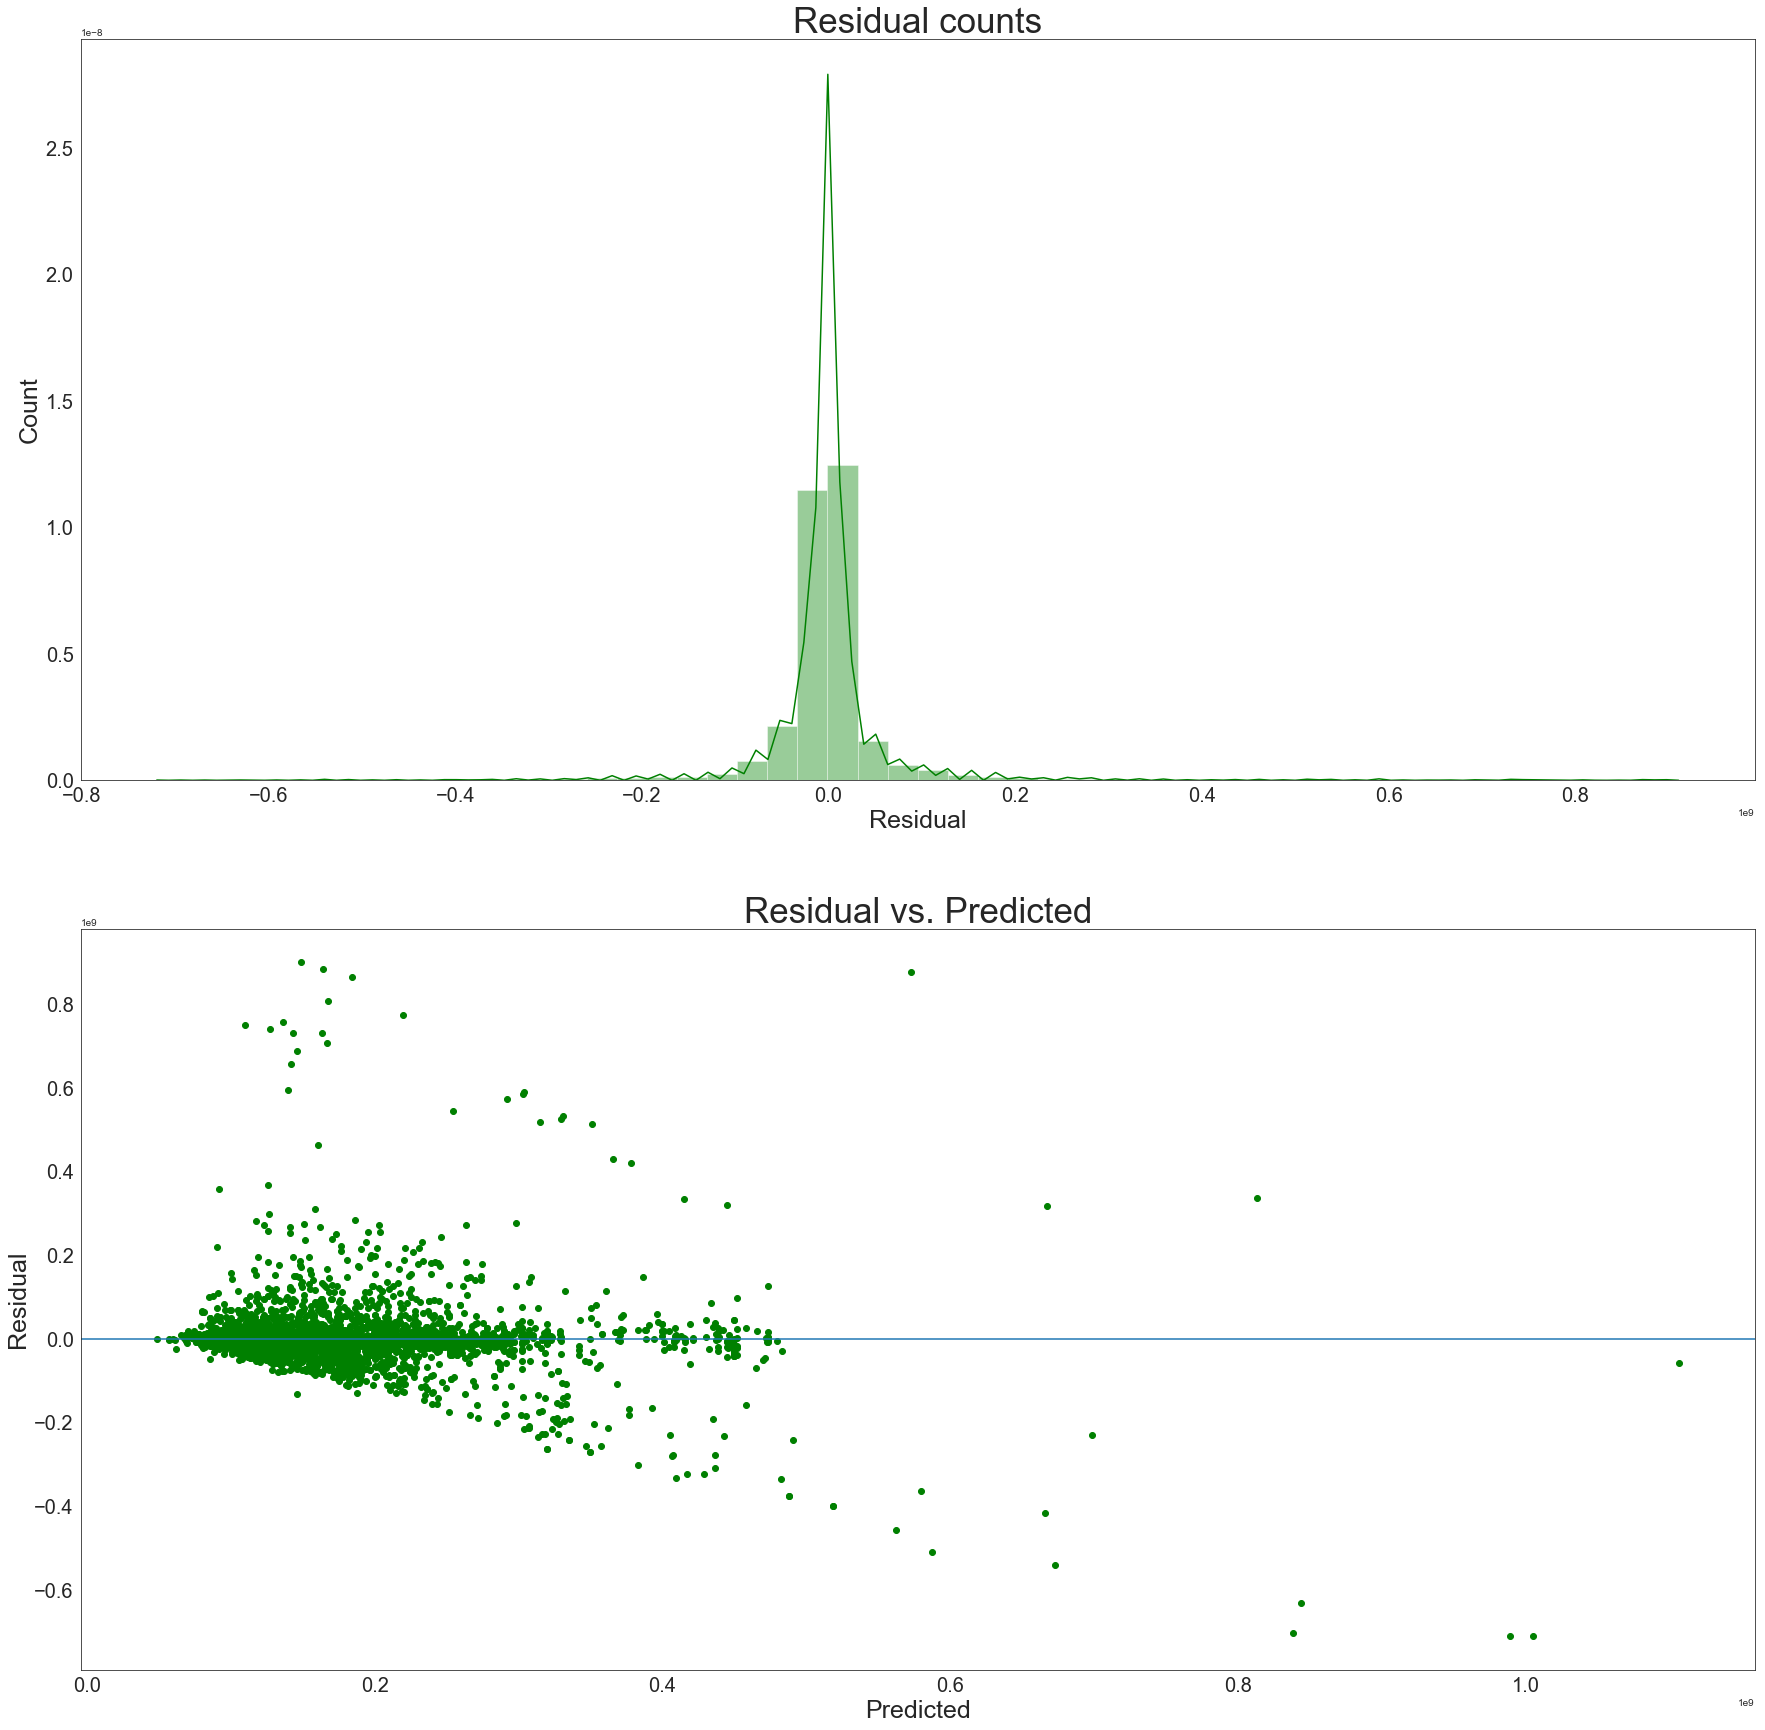

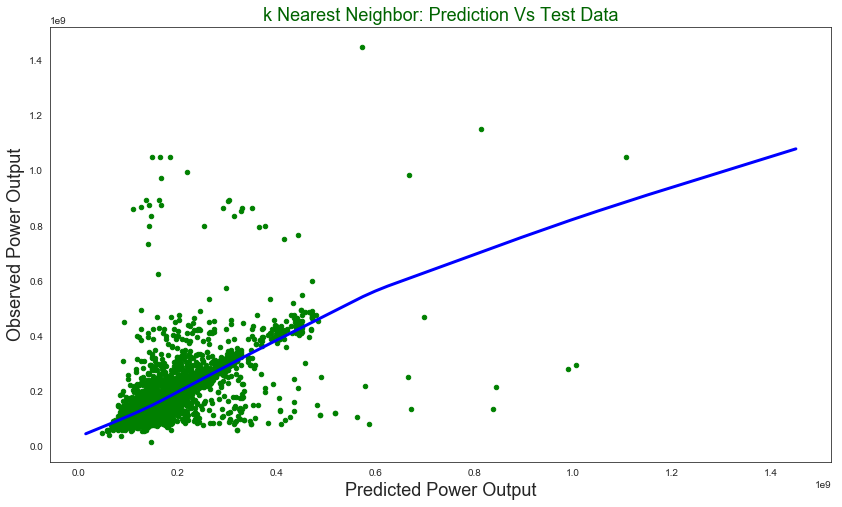

---------------
Evaluasi Model k-Nearest Neighbors
RMSE for Test Data:76619908.98
Variance score Test Data:0.42
Variance score Train Data:0.71


In [23]:
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, Y_train)

predicted_knn = knn.predict(X_test)
residual = Y_test - predicted_knn

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='green')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted_knn, residual, color ='green')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

# Scatter Plot
predicted_knn = predicted_knn.reshape(4602,)
Y_test = Y_test.reshape(4602)
test = pd.DataFrame({"prediction": predicted_knn.flatten(), "observed": Y_test.flatten()})
lowess = sm.nonparametric.lowess
z = lowess(predicted_knn.flatten(), Y_test.flatten())
test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'green')
plt.title("k Nearest Neighbor: Prediction Vs Test Data", fontsize = 18, color = "darkgreen")
plt.xlabel("Predicted Power Output", fontsize = 18) 
plt.ylabel("Observed Power Output", fontsize = 18)
plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)
plt.show()

print ("---------------")
print ("Evaluasi Model k-Nearest Neighbors")
# Menghitung RMSE
from sklearn.metrics import mean_squared_error
rmse_knn = np.sqrt(mean_squared_error(Y_test, predicted_knn))
print('RMSE for Test Data:{}'.format(np.round(rmse_knn,2)))

# R square 
from sklearn.metrics import r2_score
r2_knn_test = r2_score(Y_test, predicted_knn)
r2_knn_train = knn.score(X_train, Y_train)
print('Variance score Test Data:{}'.format(np.round(r2_knn_test,2)))
print('Variance score Train Data:{}'.format(np.round(r2_knn_train,2)))

## Decission Tree 

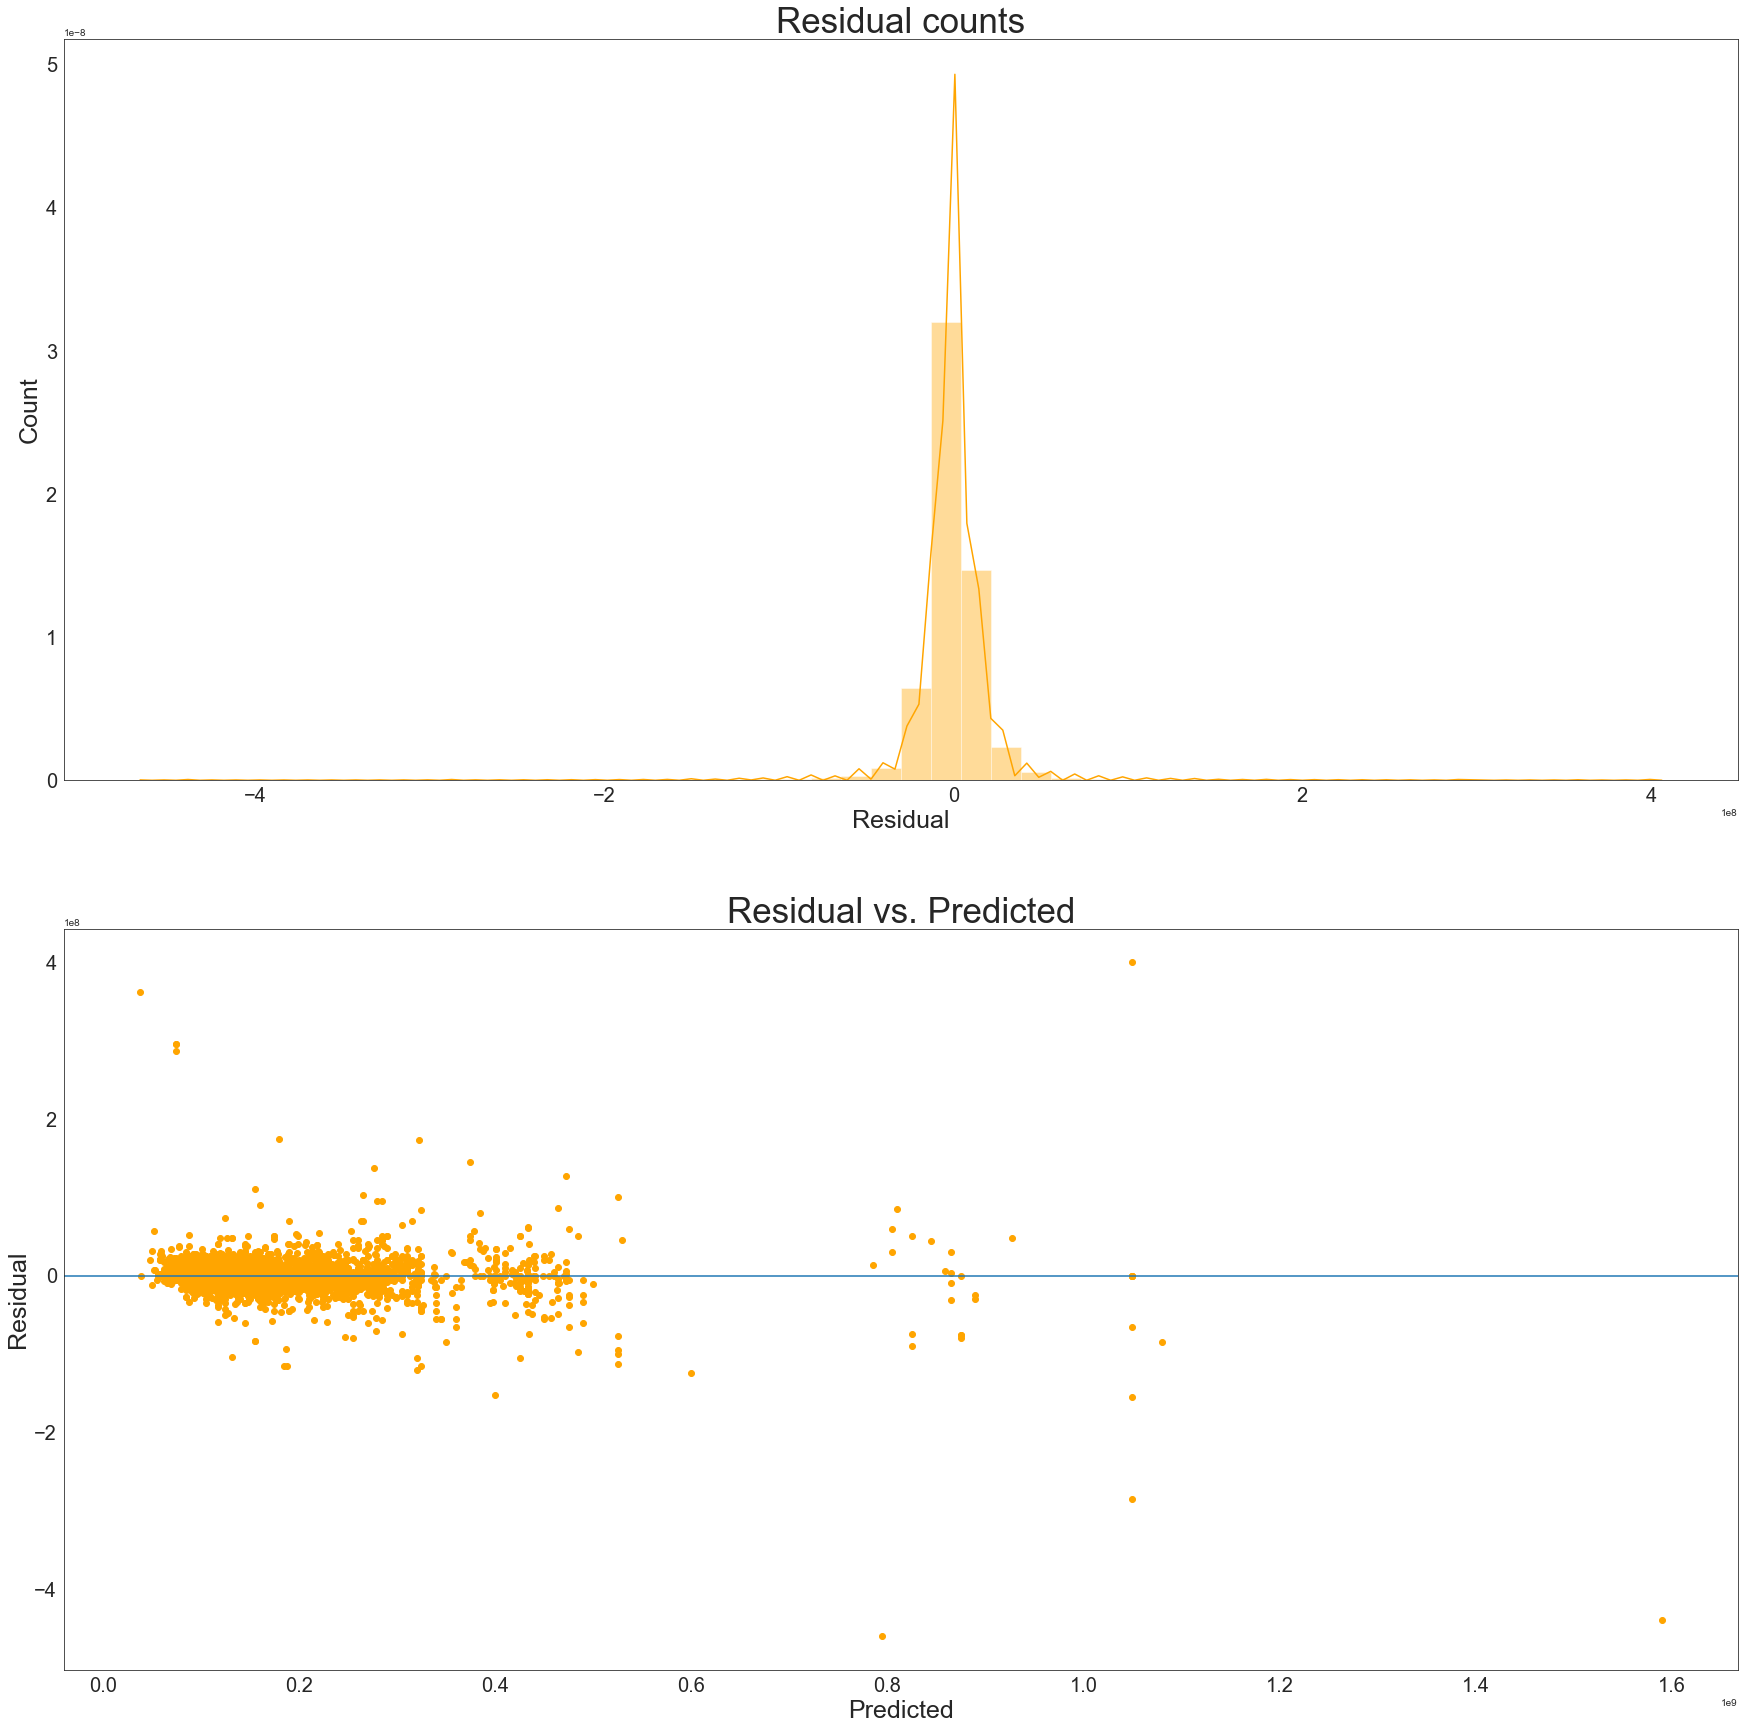

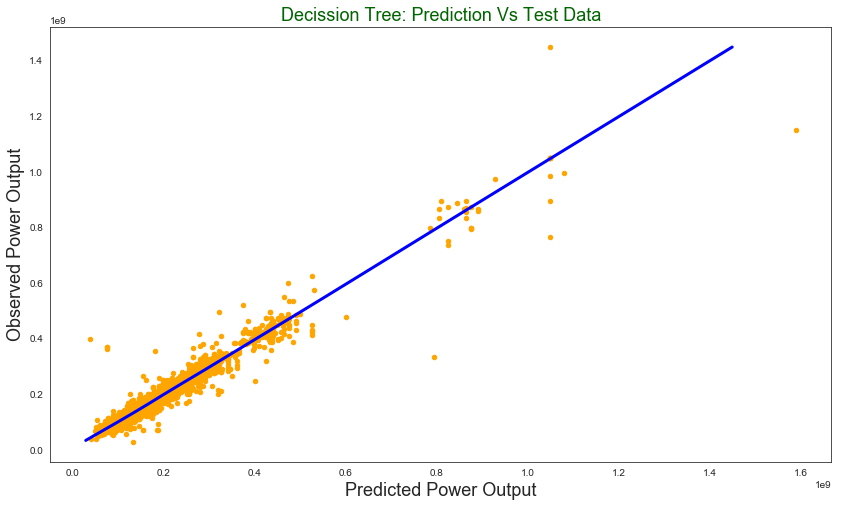

---------------
Evaluasi Model Decission Tree
RMSE fo test Data:22925085.58
Variance score Test Data:0.95
Variance score Train Data:1.0


In [10]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
predicted_dt = dt.predict(X_test)
residual = Y_test - predicted_dt

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted_dt, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

# Scatter Plot
predicted_dt = predicted_dt.reshape(4602,)
Y_test = Y_test.values.reshape(4602)
test = pd.DataFrame({"prediction": predicted_dt.flatten(), "observed": Y_test.flatten()})
lowess = sm.nonparametric.lowess
z = lowess(predicted_dt.flatten(), Y_test.flatten())
test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'orange')
plt.title("Decission Tree: Prediction Vs Test Data", fontsize = 18, color = "darkgreen")
plt.xlabel("Predicted Power Output", fontsize = 18) 
plt.ylabel("Observed Power Output", fontsize = 18)
plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)
plt.show()

print ("---------------")
print ("Evaluasi Model Decission Tree")
# Menghitung RMSE
from sklearn.metrics import mean_squared_error
rmse_dt = np.sqrt(mean_squared_error(Y_test, predicted_dt))
print('RMSE fo test Data:{}'.format(np.round(rmse_dt,2)))

from sklearn.metrics import r2_score
r2_dt_test = r2_score(Y_test, predicted_dt)
r2_dt_train = dt.score(X_train, Y_train)
print('Variance score Test Data:{}'.format(np.round(r2_dt_test,2)))
print('Variance score Train Data:{}'.format(np.round(r2_dt_train,2)))

In [53]:
# now we use the train_test_split function already available in sklearn library to split our data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state = 10000)
X_train.shape, X_test.shape

((10737, 8), (4602, 8))

## Random Forest 

C:\Users\user only\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


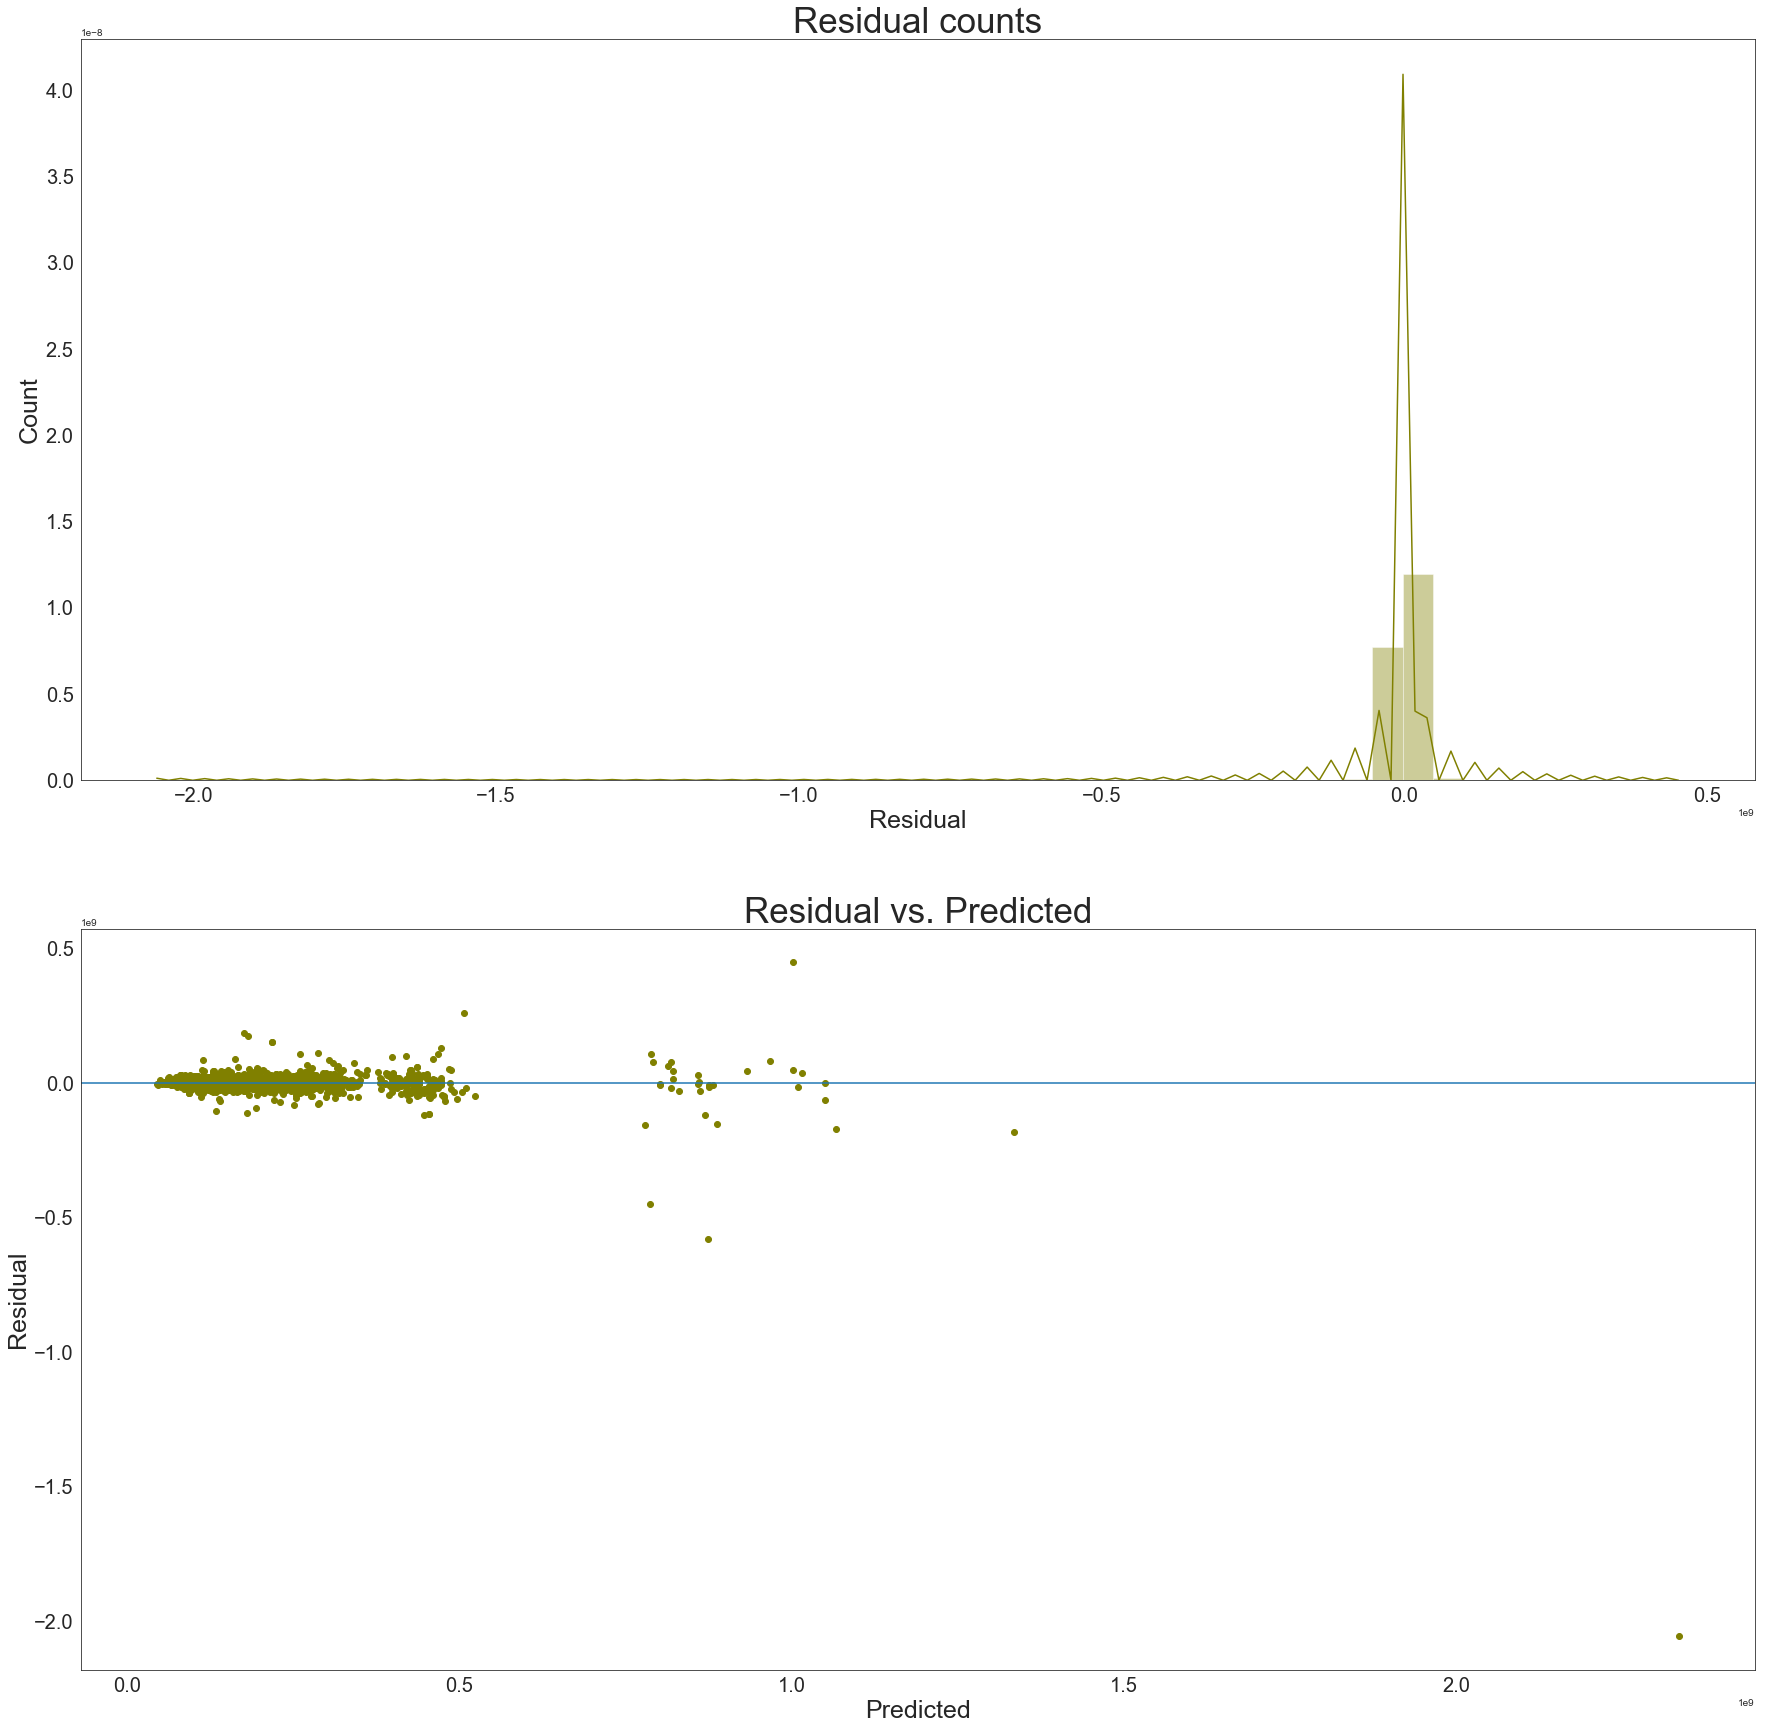

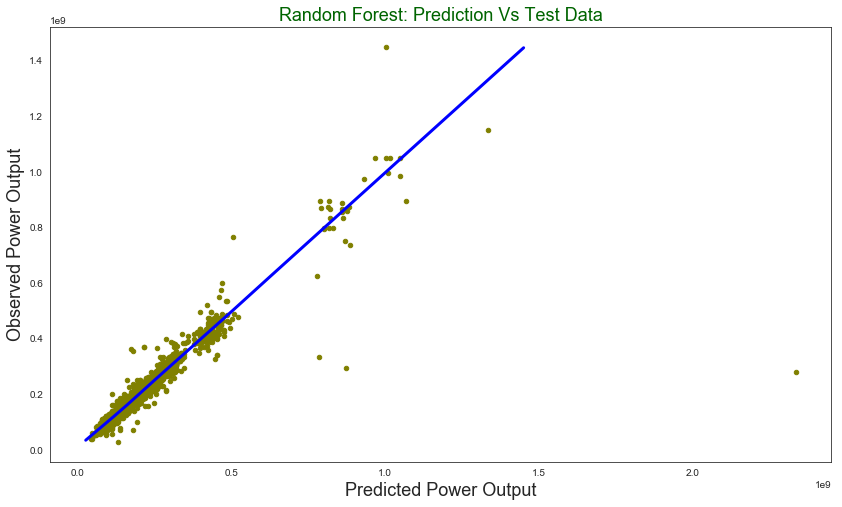

---------------
Evaluasi Model Random FOrest
RMSE:36763861.06
Variance score Test Data:0.87
Variance score Train Data:0.99


In [9]:
from sklearn.ensemble import RandomForestRegressor
# Create the model with 100 trees
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
predicted_rf = rf.predict(X_test)
residual = Y_test - predicted_rf

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='olive')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted_rf, residual, color ='olive')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

# Scatter Plot
predicted_rf = predicted_rf.reshape(4602,) 
Y_test = Y_test.values.reshape(4602)
test = pd.DataFrame({"prediction": predicted_rf.flatten(), "observed": Y_test.flatten()})
lowess = sm.nonparametric.lowess
z = lowess(predicted_rf.flatten(), Y_test.flatten())
test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'olive')
plt.title("Random Forest: Prediction Vs Test Data", fontsize = 18, color = "darkgreen")
plt.xlabel("Predicted Power Output", fontsize = 18) 
plt.ylabel("Observed Power Output", fontsize = 18)
plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)
plt.show()

print ("---------------")
print ("Evaluasi Model Random FOrest")
# Menghitung RMSE
from sklearn.metrics import mean_squared_error
rmse_rf = np.sqrt(mean_squared_error(Y_test, predicted_rf))
print('RMSE:{}'.format(np.round(rmse_rf,2)))

from sklearn.metrics import r2_score
r2_rf_test = r2_score(Y_test, predicted_rf)
r2_rf_train = rf.score(X_train, Y_train)
print('Variance score Test Data:{}'.format(np.round(r2_rf_test,2)))
print('Variance score Train Data:{}'.format(np.round(r2_rf_train,2)))

In [10]:
#akurasi 
def mean_absolute_percentage_error(Y_test, predicted_rf): 
    Y_test, Y_predicted_rf = np.array(Y_test), np.array(predicted_rf)
    return np.mean(np.abs((Y_test - predicted_rf) / Y_test)) * 100

print (100 - mean_absolute_percentage_error(Y_test, predicted_rf))

93.84285987872138


### Tunning Parameter Random Forest

*Random Forest* adalah salah satu algoritme *supervised learning* yang merupakan salah satu teknik *ensemble* yang dapat digunakan untuk tugas klasifikasi dan juga regresi dengan menggunakan multipel pohon keputusan atau *Decision Tree*. Artinya bahwa apabila *Decision Tree* hanya membangun satu pohon keputusan, *Random Forest* membangun lebih dari satu pohon keputusan sehingga memungkinkan untuk meningkatkan hasil prediksi. Teknik ini disebut *Bootstrap Aggregation* atau *Bagging* (Breiman 1996) (Breiman 2001). 
Teknik *bagging* ini akan mereduksi varian dari estimasi fungsi prediksi, sehingga tingkat ketepatan dalam memprediksi dari metode ini akan lebih akurat dibandingkan dengan *Decision Tree*, selain itu kelebihan dari metode *Random Forest* adalah dapat mengidentifikasi variabel prediktor apa saja yang relevan terhadap variabel respon, Random Forest menghasilkan ukuran tingkat kepentingan atau variabel importance variabel prediktor. 

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [int(x) for x in np.linspace(2, 2014, num = 1)]}
random_grid = GridSearchCV(rf, parameters, cv=10)
random_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'n_estimators': [2, 2014]},
             pre_di

In [15]:
random_grid.best_params_

{'n_estimators': 2014}

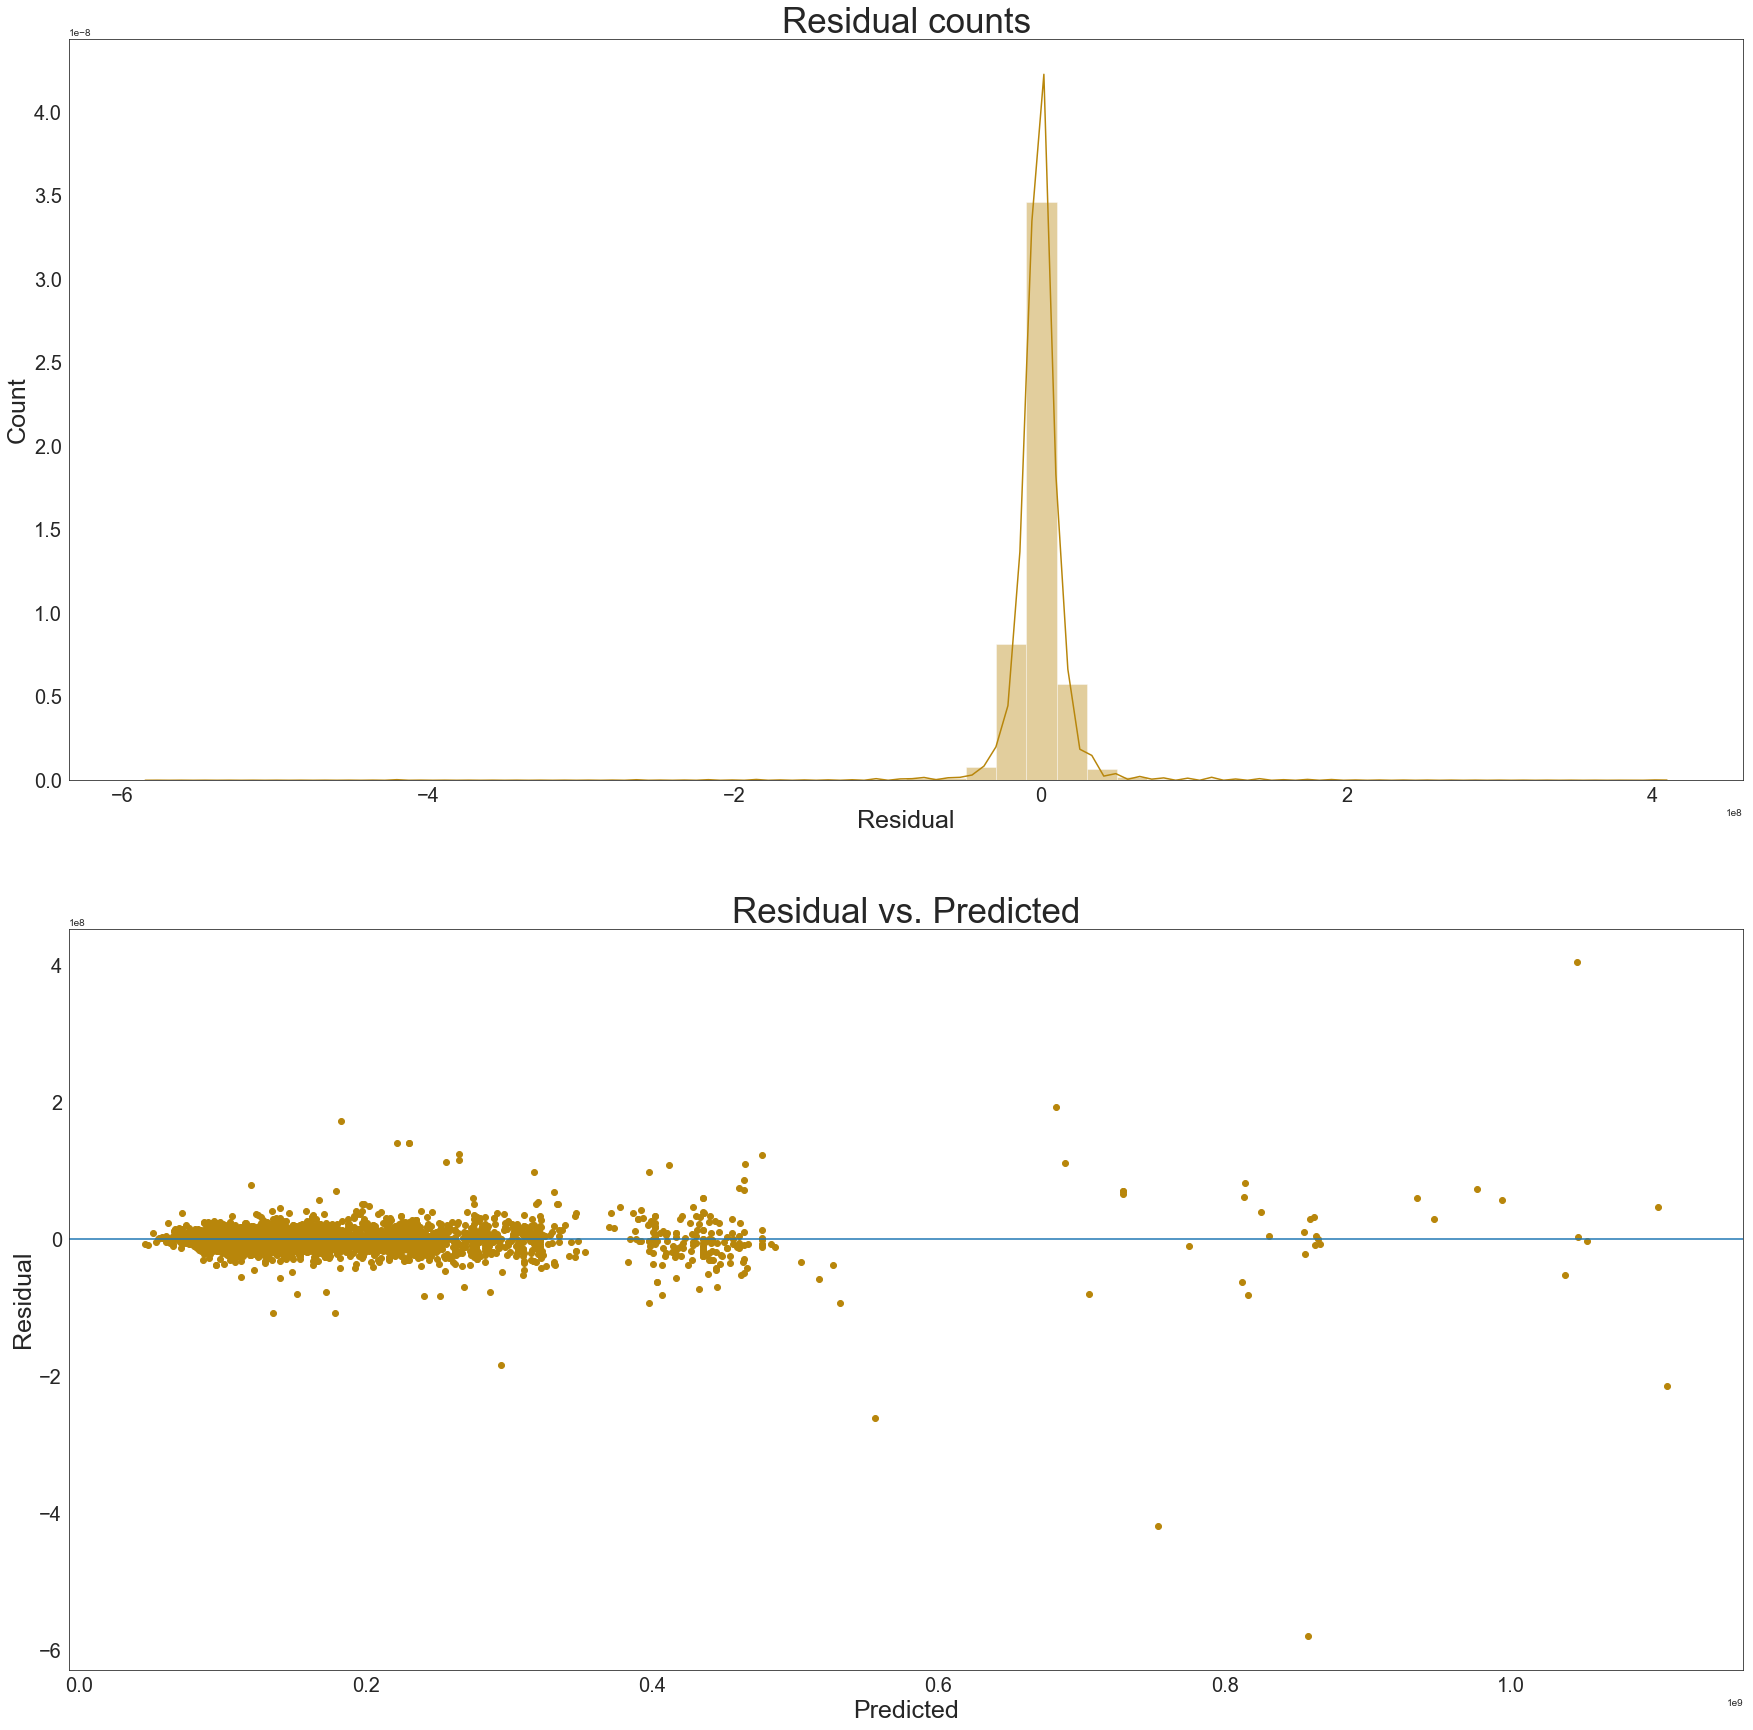

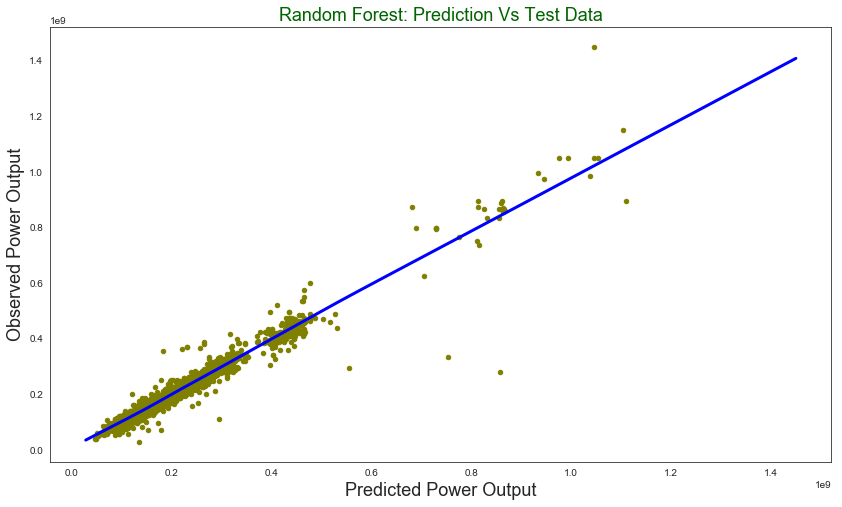

---------------
Evaluasi Model Random FOrest
RMSE for Test Data:20325364.58
Variance score Test Data:0.96
Variance score Train Data:0.94


In [11]:
rf_rs = RandomForestRegressor(n_estimators = 64,
                             min_samples_leaf=2)

rf_rs.fit(X_train, Y_train)
predicted_rf_rs = rf_rs.predict(X_test)
residual = Y_test - predicted_rf_rs

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='darkgoldenrod')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted_rf_rs, residual, color ='darkgoldenrod')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

# Scatter Plot
predicted_rf_rs = predicted_rf_rs.reshape(4602,) 
Y_test = Y_test.reshape(4602)
test = pd.DataFrame({"prediction": predicted_rf_rs.flatten(), "observed": Y_test.flatten()})
lowess = sm.nonparametric.lowess
z = lowess(predicted_rf_rs.flatten(), Y_test.flatten())
test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'olive')
plt.title("Random Forest: Prediction Vs Test Data", fontsize = 18, color = "darkgreen")
plt.xlabel("Predicted Power Output", fontsize = 18) 
plt.ylabel("Observed Power Output", fontsize = 18)
plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)
plt.show()

print ("---------------")
print ("Evaluasi Model Random FOrest")
# Menghitung RMSE
from sklearn.metrics import mean_squared_error
rmse_rf_rs = np.sqrt(mean_squared_error(Y_test, predicted_rf_rs))
print('RMSE for Test Data:{}'.format(np.round(rmse_rf_rs,2)))

from sklearn.metrics import r2_score
r2_rf_rs_test = r2_score(Y_test, predicted_rf_rs)
r2_rf_rs_train = rf_rs.score(X_train, Y_train)
print('Variance score Test Data:{}'.format(np.round(r2_rf_rs_test,2)))
print('Variance score Train Data:{}'.format(np.round(r2_rf_rs_train,2)))

In [12]:
#akurasi 
def mean_absolute_percentage_error(Y_test, predicted_rf_rs): 
    y_true, y_pred = np.array(Y_test), np.array(predicted_rf_rs)
    return np.mean(np.abs((Y_test - predicted_rf_rs) / Y_test)) * 100

print (100 - mean_absolute_percentage_error(Y_test, predicted_rf_rs))

94.00940469437151


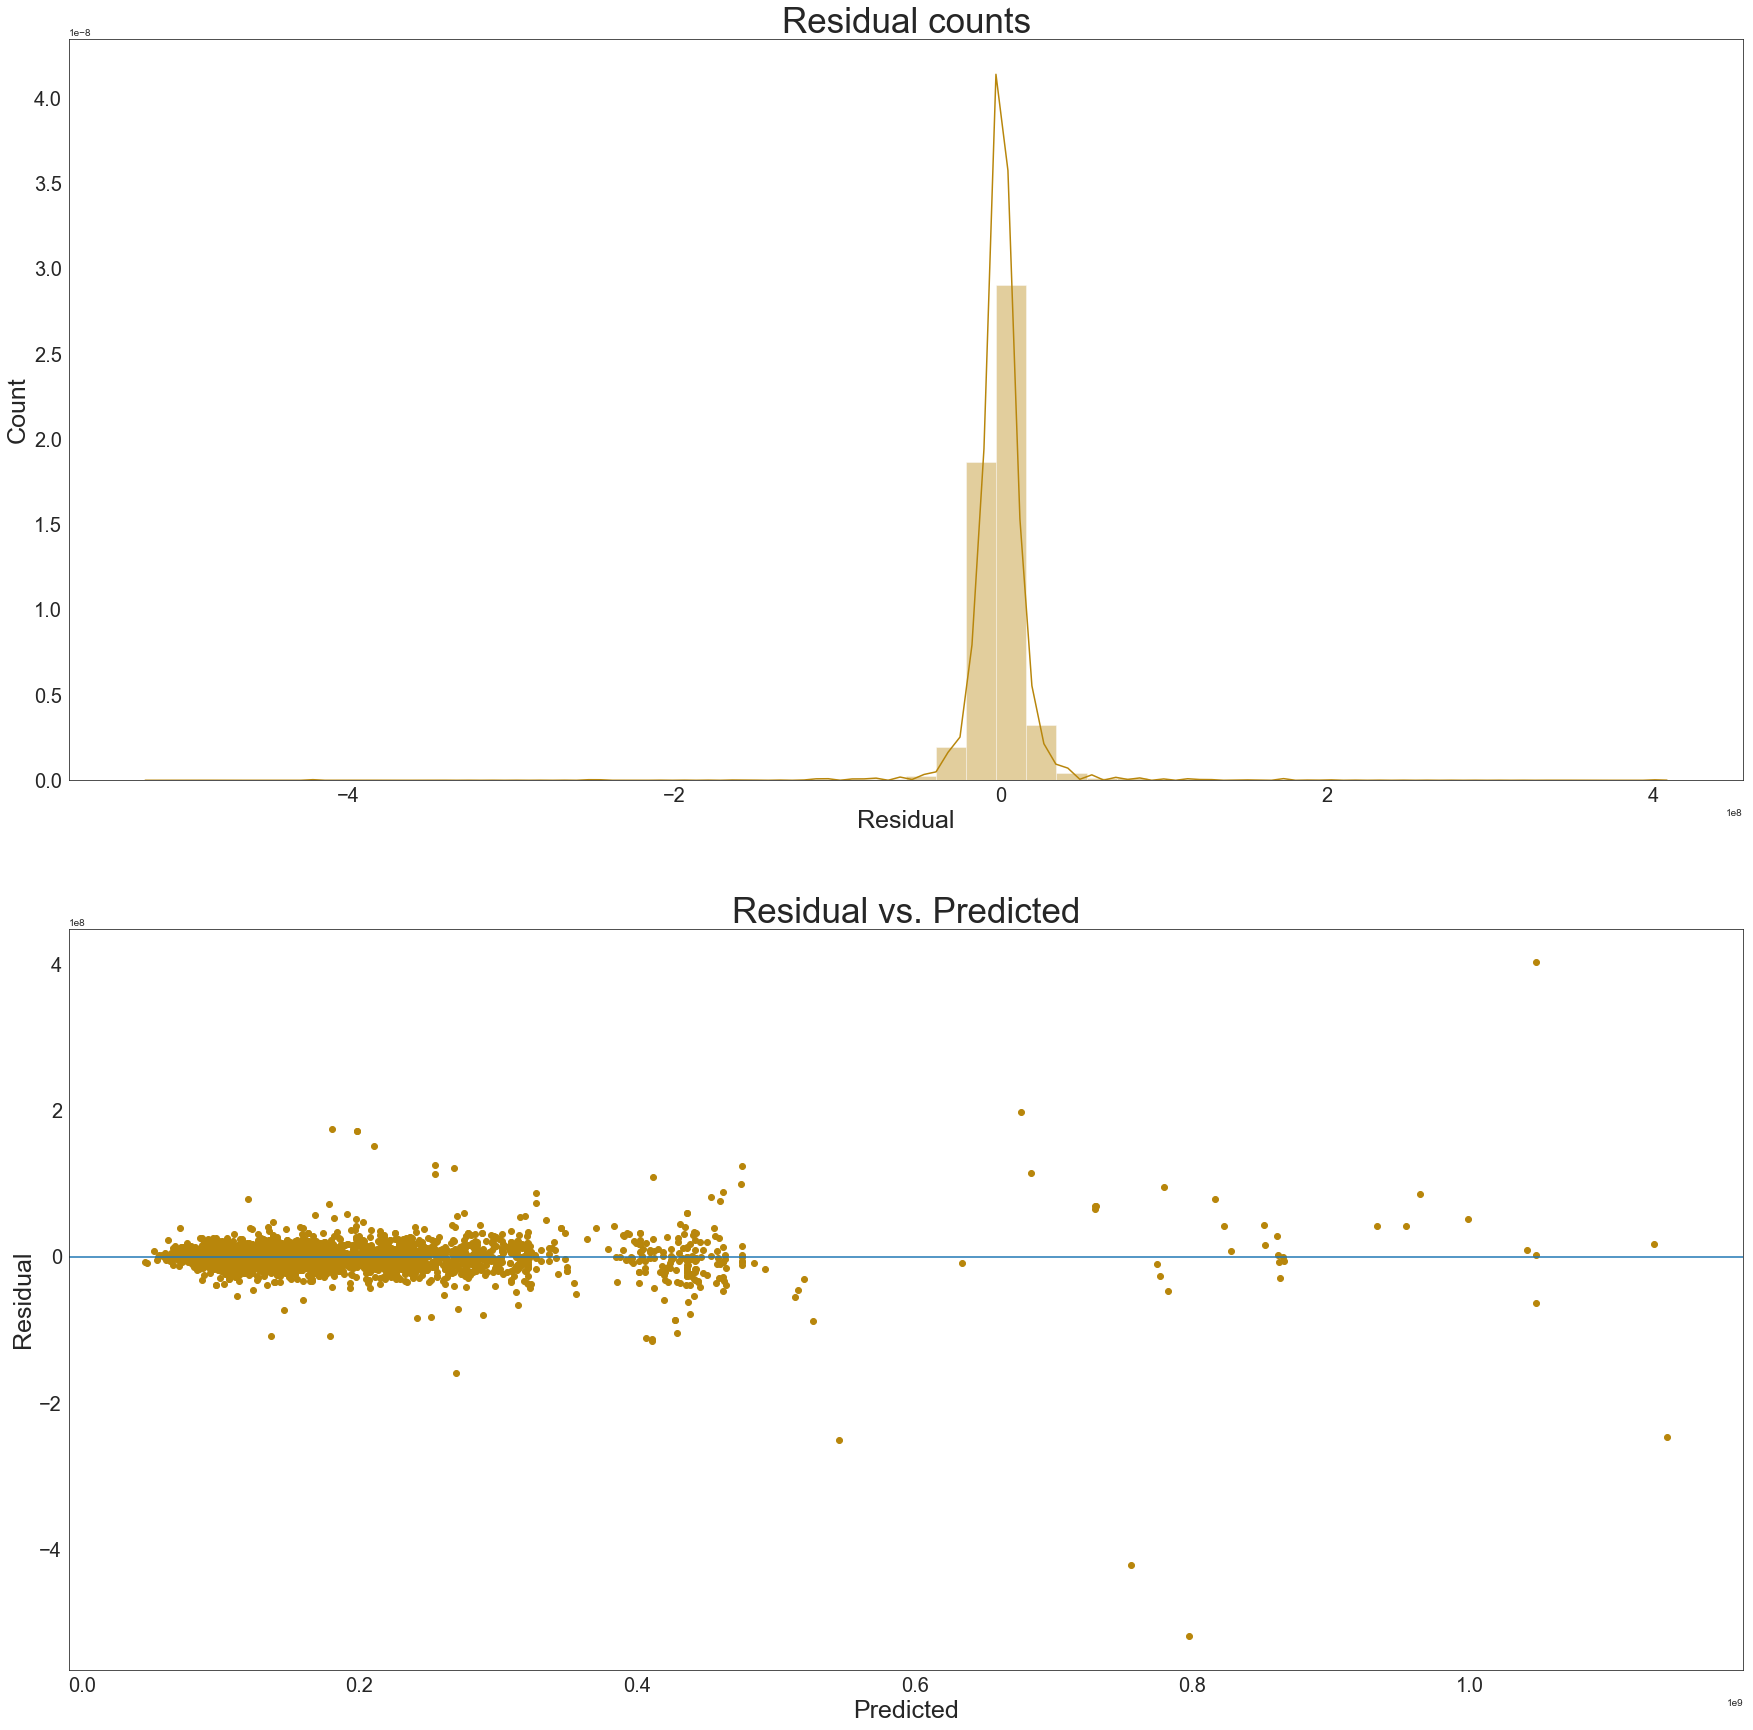

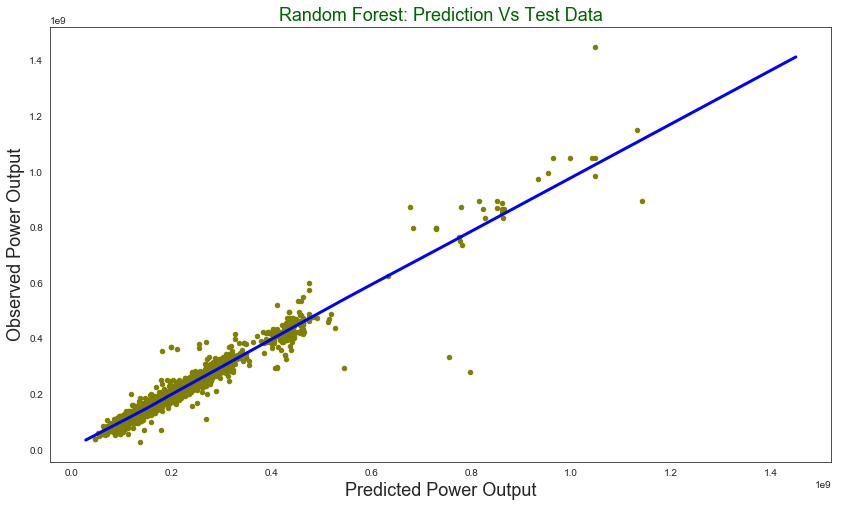

---------------
Evaluasi Model Random FOrest
RMSE for Test Data:20240232.95
Variance score Test Data:0.96
Variance score Train Data:0.93


In [14]:
rf_rs = RandomForestRegressor(n_estimators = 64,
                             min_samples_leaf= 2)

rf_rs.fit(X_train, Y_train)
predicted_rf_rs = rf_rs.predict(X_test)
residual = Y_test - predicted_rf_rs

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='darkgoldenrod')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted_rf_rs, residual, color ='darkgoldenrod')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

# Scatter Plot
predicted_rf_rs = predicted_rf_rs.reshape(4602,) 
Y_test = Y_test.reshape(4602)
test = pd.DataFrame({"prediction": predicted_rf_rs.flatten(), "observed": Y_test.flatten()})
lowess = sm.nonparametric.lowess
z = lowess(predicted_rf_rs.flatten(), Y_test.flatten())
test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'olive')
plt.title("Random Forest: Prediction Vs Test Data", fontsize = 18, color = "darkgreen")
plt.xlabel("Predicted Power Output", fontsize = 18) 
plt.ylabel("Observed Power Output", fontsize = 18)
plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)
plt.show()

print ("---------------")
print ("Evaluasi Model Random FOrest")
# Menghitung RMSE
from sklearn.metrics import mean_squared_error
rmse_rf_rs = np.sqrt(mean_squared_error(Y_test, predicted_rf_rs))
print('RMSE for Test Data:{}'.format(np.round(rmse_rf_rs,2)))

from sklearn.metrics import r2_score
r2_rf_rs_test = r2_score(Y_test, predicted_rf_rs)
r2_rf_rs_train = rf_rs.score(X_train, Y_train)
print('Variance score Test Data:{}'.format(np.round(r2_rf_rs_test,2)))
print('Variance score Train Data:{}'.format(np.round(r2_rf_rs_train,2)))

In [15]:
#akurasi 
def mean_absolute_percentage_error(Y_test, predicted_rf_rs): 
    y_true, y_pred = np.array(Y_test), np.array(predicted_rf_rs)
    return np.mean(np.abs((Y_test - predicted_rf_rs) / Y_test)) * 100

print (100 - mean_absolute_percentage_error(Y_test, predicted_rf_rs))

94.0038587491335


In [17]:
import pandas
df = pandas.DataFrame(Y_test)
df.to_csv("D:\\Alfa\\Skripsi\\rf\\tetsing.csv", sep=',',index=False)

In [13]:
import pandas
df = pandas.DataFrame(predicted_rf_rs)
df.to_csv("D:\\Alfa\\Skripsi\\rf\\prediksi.csv", sep=',',index=False)

In [16]:
import pandas
df = pandas.DataFrame(residual)
df.to_csv("D:\\Alfa\\Skripsi\\rf\\residual.csv", sep=',',index=False)

In [24]:
# Saving feature names for later use
feature_list = list(X_train.columns)
feature_list
# Convert to numpy array
features = np.array(feature_list)
features

array(['Mobil', 'Jenis', 'Tipe', 'gearshift', 'fuel', 'distance', 'city',
       'Tahun'], dtype='<U9')

In [32]:
from sklearn.tree import export_graphviz
from IPython import display
from sklearn.ensemble import RandomForestRegressor

str_tree = export_graphviz(predicted_rf_rs,
                           out_file=None, 
                           feature_names=X_train.columns, # column names
                           filled=True,        
                           special_characters=True, 
                           rotate=True, 
                           precision=1)

display.display(str_tree)

TypeError: [1.31472693e+08 1.38201804e+08 9.33567708e+07 ... 3.70098772e+08
 1.23711626e+08 1.28932053e+08] is not an estimator instance.

In [38]:
from IPython.display import Image
from io import StringIO
import pydotplus

def plot_decission_tree(predicted_rf_rs, feature_name, target_name):
    dot_data = stringIO()
    tree.export_graphviz(clf,
                         out_file=dot_data,
                         feature_names=feature_name,
                         class_names=target_name,
                         filled=True,
                         rounded=True,
                         special_characters=True)
    
graph  =pydotplus.graph_from_dot_data(dot_data.getvalues())
return Image(graph.create_png())

NameError: name 'dot_data' is not defined

In [14]:
importances = rf_rs.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.49730588088634786, 'Tipe'), (0.25482500865331503, 'Tahun'), (0.14835597668098827, 'Jenis'), (0.0321930796193503, 'Mobil'), (0.0320603218557266, 'distance'), (0.013185315654195198, 'gearshift'), (0.012757209251033248, 'city'), (0.009317207399043381, 'fuel')]


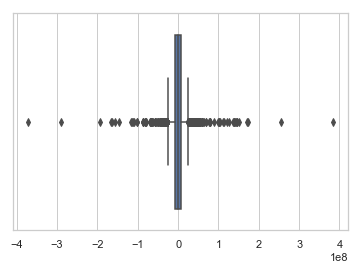

In [16]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=residual)
ax

In [17]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

stat, p =shapiro(residual)
print('Statistics=%.3f, p=%.3f' %(stat, p))
alpha = 0.05
if p > alpha:
    print('Sampel looks Gaussian (fail to reject HO)')
else:
    print('Sampel doess not looks Gaussian (reject HO)')

Statistics=0.638, p=0.000
Sampel doess not looks Gaussian (reject HO)


In [ ]:

images = [ PIL.Image.open(f) for f in glob('./*.png') ]

In [20]:
A = Y_test.reshape(-1, 1)
B = predicted_rf_rs.reshape(-1, 1)

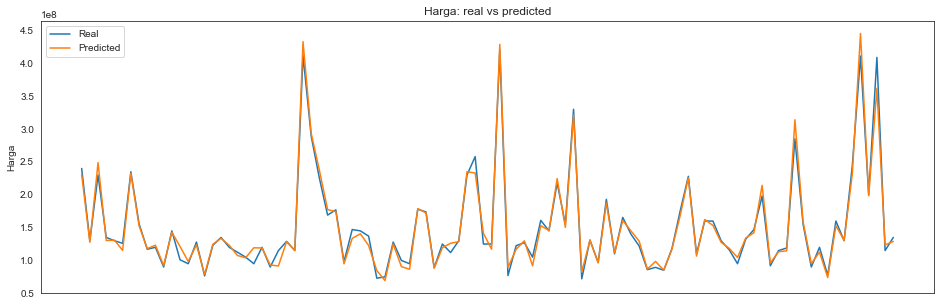

In [21]:
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Harga: real vs predicted")
plt.ylabel("Harga")
plt.xticks(())
plt.show()

In [18]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf_rs, X_train, Y_train):
    return r2_score(Y_train, rf_rs.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf_rs, X_train, Y_train, r2)
perm_imp_rfpimp

,Importance
Feature,
Tipe,1.969875
Tahun,0.594815
Jenis,0.471793
distance,0.037343
fuel,0.036979
Mobil,0.031128
gearshift,0.016677
city,0.007064


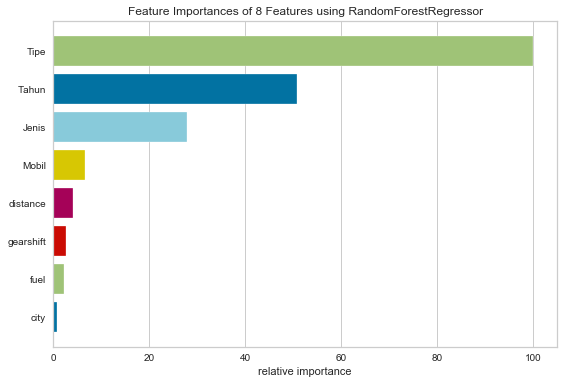

In [23]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(rf_rs)
viz.fit(X_train, Y_train)
viz.show()

In [36]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'k- Nearest Neighbors', 'Decision Trees', 'Random Forest', 'Random Forest with Tuning'],
    'r2_train'      : [r2_lr_train, r2_knn_train, r2_dt_train, r2_rf_train, r2_rf_rs_train],
    'r2_test'      : [r2_lr_test, r2_knn_test, r2_dt_test, r2_rf_test, r2_rf_rs_test],
    'RMSE_test'    : [rmse_lr, rmse_knn, rmse_dt, rmse_rf, rmse_rf_rs]
    }, columns = ['Model', 'r2_train', 'r2_test', 'RMSE_test'])

modelDF.sort_values(by='r2_test', ascending=False)

,Model,r2_train,r2_test,RMSE_test
4,Random Forest with Tuning,0.967787,0.957972,2.057268e+07
2,Decision Trees,0.996775,0.952017,2.198189e+07
3,Random Forest,0.972865,0.943686,2.381393e+07
0,Linear Regression,0.848127,0.888016,3.358143e+07
1,k- Nearest Neighbors,0.710040,0.417038,7.661991e+07
